In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno as msno 
from sklearn import preprocessing
from scipy import stats
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("603b8a7067d34_Dataset_for_Datanest.csv")

In [3]:
data.head()

enrollee_id      city  city_development_index  gender  \
0        32403   city_41                   0.827    Male   
1         9858  city_103                   0.920  Female   
2        31806   city_21                   0.624    Male   
3        27385   city_13                   0.827    Male   
4        27724  city_103                   0.920    Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience    Full time course        Graduate   
1  Has relevent experience       no_enrollment        Graduate   
2   No relevent experience       no_enrollment     High School   
3  Has relevent experience       no_enrollment         Masters   
4  Has relevent experience       no_enrollment        Graduate   

  major_discipline experience company_size company_type last_new_job  \
0             STEM          9          <10          NaN            1   
1             STEM          5          NaN      Pvt Ltd            1   
2              NaN         <1          NaN      Pvt Ltd        never   
3             STEM         11       Oct-49      Pvt Ltd            1   
4             STEM        >20       10000+      Pvt Ltd           >4   

   training_hours  
0            21.0  
1            98.0  
2            15.0  
3            39.0  
4            72.0

In [4]:
cols=data.columns
print(cols)

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')


In [5]:
data.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      2
gender                    243
relevent_experience         1
enrolled_university        19
education_level            32
major_discipline          159
experience                  6
company_size              298
company_type              301
last_new_job               22
training_hours              1
dtype: int64

In [6]:
data.describe()

enrollee_id  city_development_index  training_hours
count    988.000000               986.00000      987.000000
mean   16705.010121                 0.82391       65.951368
std     9553.216223                 0.14250       59.732871
min        3.000000                -0.69800        1.000000
25%     8490.250000                 0.73800       24.000000
50%    16852.000000                 0.91000       48.000000
75%    24820.500000                 0.92000       88.000000
max    33343.000000                 0.94900      332.000000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             988 non-null    int64  
 1   city                    988 non-null    object 
 2   city_development_index  986 non-null    float64
 3   gender                  745 non-null    object 
 4   relevent_experience     987 non-null    object 
 5   enrolled_university     969 non-null    object 
 6   education_level         956 non-null    object 
 7   major_discipline        829 non-null    object 
 8   experience              982 non-null    object 
 9   company_size            690 non-null    object 
 10  company_type            687 non-null    object 
 11  last_new_job            966 non-null    object 
 12  training_hours          987 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 100.5+ KB


## **DATA CLEANING**

In [8]:
set(data['gender'])

{'Female', 'Femalee', 'Male', 'Other', nan}

In [9]:
data.gender=data['gender'].replace('Femalee','Female')
data['relevent_experience']=data['relevent_experience'].replace('Has relevent experiencee','Has relevent experience')

In [10]:
print("Number of males in the dataset ",(data['gender']=='Male').sum())
print("Number of females in the dataset ",(data['gender']=='Female').sum())
print("Number of other in the dataset ",(data['gender']=='Other').sum())

Number of males in the dataset  669
Number of females in the dataset  64
Number of other in the dataset  12


In [11]:
# Replacing nan in the gender column with either Female,Male or others with a probability distribution already present in the dataset.
# Male probability:0.8979
# Female probability:0.0859
# Others probability:0.0161
x = random.random()
if x <= .8979:
  data.loc[data["gender"].isnull(),"gender"] = "Male"
elif x <= (.8979 + .0859):
  data.loc[data["gender"].isnull(),"gender"] = "Female"
else :
  data.loc[data["gender"].isnull(),"gender"] = "Other"
   
print(data["gender"].unique())

['Male' 'Female' 'Other']


In [12]:
set(data['major_discipline'])

{'Arts', 'Business Degree', 'Humanities', 'No Major', 'Other', 'STEM', nan}

In [13]:
print("Number of Arts in the dataset ",(data['major_discipline']=='Arts').sum())
print("Number of Business Degree in the dataset ",(data['major_discipline']=='Business Degree').sum())
print("Number of Humanities in the dataset ",(data['major_discipline']=='Humanities').sum())
print("Number of No Major in the dataset ",(data['major_discipline']=='No Major').sum())
print("Number of STEM in the dataset ",(data['major_discipline']=='STEM').sum())
print("Number of Other in the dataset ",(data['major_discipline']=='Other').sum())

Number of Arts in the dataset  10
Number of Business Degree in the dataset  8
Number of Humanities in the dataset  36
Number of No Major in the dataset  9
Number of STEM in the dataset  751
Number of Other in the dataset  15


In [14]:
# Replacing nan in the majors column with either Arts,Business Degree,Humanities, No Major,STEM or otherswith a probability distribution already present in the dataset.
# Arts probability:0.0120
# Business Degree probability:0.00965
# Humanities probability:0.0434
# No Major probability:0.0108
# STEM Degree probability:0.9059
# Others probability:0.0180

x = random.random()
if x <= 0.9059:
  data.loc[data["major_discipline"].isnull(),"major_discipline"] = "STEM"
elif x <= (0.9059 + 0.0434):
  data.loc[data["major_discipline"].isnull(),"major_discipline"] = "Humanities"
elif x<= (0.9059 + 0.0434 + 0.0180) :
  data.loc[data["major_discipline"].isnull(),"major_discipline"] = "Others"
elif x<= (0.9059 + 0.0434 + 0.0180 + 0.0108) :
  data.loc[data["major_discipline"].isnull(),"major_discipline"] = "No Major"
else:
  data.loc[data["major_discipline"].isnull(),"major_discipline"] = "Business Degree"

print(data["major_discipline"].unique())


['STEM' 'Other' 'Business Degree' 'Arts' 'Humanities' 'No Major']


In [15]:
set(data['company_size'])

{'100-500',
 '1000-4999',
 '10000+',
 '50-99',
 '500-999',
 '5000-9999',
 '<10',
 'Oct-49',
 nan}

In [16]:
print("Number of 100-500 in the dataset ",(data['company_size']=='100-500').sum())
print("Number of 1000-4999 in the dataset ",(data['company_size']=='1000-4999').sum())
print("Number of 10000+ in the dataset ",(data['company_size']=='10000+').sum())
print("Number of 50-99 in the dataset ",(data['company_size']=='50-99').sum())
print("Number of 500-999 in the dataset ",(data['company_size']=='500-999').sum())
print("Number of 5000-9999 in the dataset ",(data['company_size']=='5000-9999').sum())
print("Number of <10 in the dataset ",(data['company_size']=='<10').sum())
print("Number of Oct-49 in the dataset ",(data['company_size']=='Oct-49').sum())

Number of 100-500 in the dataset  158
Number of 1000-4999 in the dataset  76
Number of 10000+ in the dataset  92
Number of 50-99 in the dataset  161
Number of 500-999 in the dataset  32
Number of 5000-9999 in the dataset  31
Number of <10 in the dataset  69
Number of Oct-49 in the dataset  71


In [17]:
# Replacing nan in the company_size column with either 100-500,1000-4999,10000+,'50-99','500-999','5000-9999','<10','Oct-49' with a probability distribution already present in the dataset.
# 100-500 probability:0.2289
# 1000-4999 probability:0.1101
# 10000+ probability:0.1333
# 50-99 probability:0.2333
# 500-999 Degree probability:0.0465
# 5000-9999 probability:0.0465
# <10 Degree probability:0.100
# Oct-49 Degree probability:0.1028

x = random.random()
if x <= 0.2333:
  data.loc[data["company_size"].isnull(),"company_size"] = "50-99"
elif x <= (0.2333 + 0.2289):
  data.loc[data["company_size"].isnull(),"company_size"] = "100-500"
elif x<= (0.2333 + 0.2289 + 0.1333) :
  data.loc[data["company_size"].isnull(),"company_size"] = "10000+"
elif x<= (0.2333 + 0.2289 + 0.1333 + 0.1101) :
  data.loc[data["company_size"].isnull(),"company_size"] = "1000-4999"
elif x<= (0.2333 + 0.2289 + 0.1333 + 0.1101 + 0.1028) :
  data.loc[data["company_size"].isnull(),"company_size"] = "Oct-49"
elif x<= (0.2333 + 0.2289 + 0.1333 + 0.1101 + 0.1028 + 0.100) :
  data.loc[data["company_size"].isnull(),"company_size"] = "<10"
elif x<= (0.2333 + 0.2289 + 0.1333 + 0.1101 + 0.1028 + 0.100 + 0.0465) :
  data.loc[data["company_size"].isnull(),"company_size"] = "500-999"
else:
  data.loc[data["company_size"].isnull(),"company_size"] = "5000-9999"

print(data["company_size"].unique())

['<10' '10000+' 'Oct-49' '100-500' '50-99' '1000-4999' '500-999'
 '5000-9999']


In [18]:
set(data['company_type'])

{'Early Stage Startup',
 'Funded Startup',
 'NGO',
 'Other',
 'Public Sector',
 'Pvt Ltd',
 nan}

In [19]:
print("Number of Early Stage Startup in the dataset ",(data['company_type']=='Early Stage Startup').sum())
print("Number of Funded Startup in the dataset ",(data['company_type']=='Funded Startup').sum())
print("Number of NGO in the dataset ",(data['company_type']=='NGO').sum())
print("Number of Other in the dataset ",(data['company_type']=='Other').sum())
print("Number of Public Sector in the dataset ",(data['company_type']=='Public Sector').sum())
print("Number of Pvt Ltd in the dataset ",(data['company_type']=='Pvt Ltd').sum())

Number of Early Stage Startup in the dataset  28
Number of Funded Startup in the dataset  45
Number of NGO in the dataset  21
Number of Other in the dataset  4
Number of Public Sector in the dataset  59
Number of Pvt Ltd in the dataset  530


In [20]:
# Replacing nan in the compamy_type column with either with a probability distribution already present in the dataset.
# Early Stage probability:0.0407
# Funded Startup probability:0.0655
# NGO probability:0.0305
# Others probability:0.0058
# Public Sector Degree probability:0.0858
# Private Sector probability:0.7714

x = random.random()
if x <= 0.7714:
  data.loc[data["company_type"].isnull(),"company_type"] = "Pvt Ltd"
elif x <= (0.7714 + 0.0858):
  data.loc[data["company_type"].isnull(),"company_type"] = "Public Sector"
elif x<= (0.7714 + 0.0858 + 0.0655) :
  data.loc[data["company_type"].isnull(),"company_type"] = "Funded Startup"
elif x<= (0.7714 + 0.0858 + 0.0655 + 0.0407) :
  data.loc[data["company_type"].isnull(),"company_type"] = "Early Stage Startup"
elif x<= (0.7714 + 0.0858 + 0.0655 + 0.0407+ 0.0305) :
  data.loc[data["company_type"].isnull(),"company_type"] = "NGO"
else:
  data.loc[data["company_type"].isnull(),"company_type"] = "Other"

print(data["company_type"].unique())

['Pvt Ltd' 'Funded Startup' 'Other' 'Public Sector' 'Early Stage Startup'
 'NGO']


In [21]:
# for rest of the fields since the number of nan fields were less so we directly replaced the Nan fields for those columns with the mode values.
data['city_development_index']=data['city_development_index'].fillna(0.82391)
data['relevent_experience']=data['relevent_experience'].fillna('Has relevent experience')
data['enrolled_university']=data['enrolled_university'].fillna('no_enrollment')
data['education_level']=data['education_level'].fillna('Graduate')
data['experience']=data['experience'].fillna("1")
data['training_hours']=data['training_hours'].fillna(65.95)
data['last_new_job']=data['last_new_job'].fillna('1')

In [22]:
data.head()

enrollee_id      city  city_development_index  gender  \
0        32403   city_41                   0.827    Male   
1         9858  city_103                   0.920  Female   
2        31806   city_21                   0.624    Male   
3        27385   city_13                   0.827    Male   
4        27724  city_103                   0.920    Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience    Full time course        Graduate   
1  Has relevent experience       no_enrollment        Graduate   
2   No relevent experience       no_enrollment     High School   
3  Has relevent experience       no_enrollment         Masters   
4  Has relevent experience       no_enrollment        Graduate   

  major_discipline experience company_size company_type last_new_job  \
0             STEM          9          <10      Pvt Ltd            1   
1             STEM          5       10000+      Pvt Ltd            1   
2             STEM         <1       10000+      Pvt Ltd        never   
3             STEM         11       Oct-49      Pvt Ltd            1   
4             STEM        >20       10000+      Pvt Ltd           >4   

   training_hours  
0            21.0  
1            98.0  
2            15.0  
3            39.0  
4            72.0

In [23]:
# matplotlib setting
plt.rc('font', size=12) 
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=12) 
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12) 
plt.rc('legend', fontsize=12) 
plt.rc('figure', titlesize=14) 
plt.rcParams['figure.dpi'] = 300
sns.set_style("whitegrid")

colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))

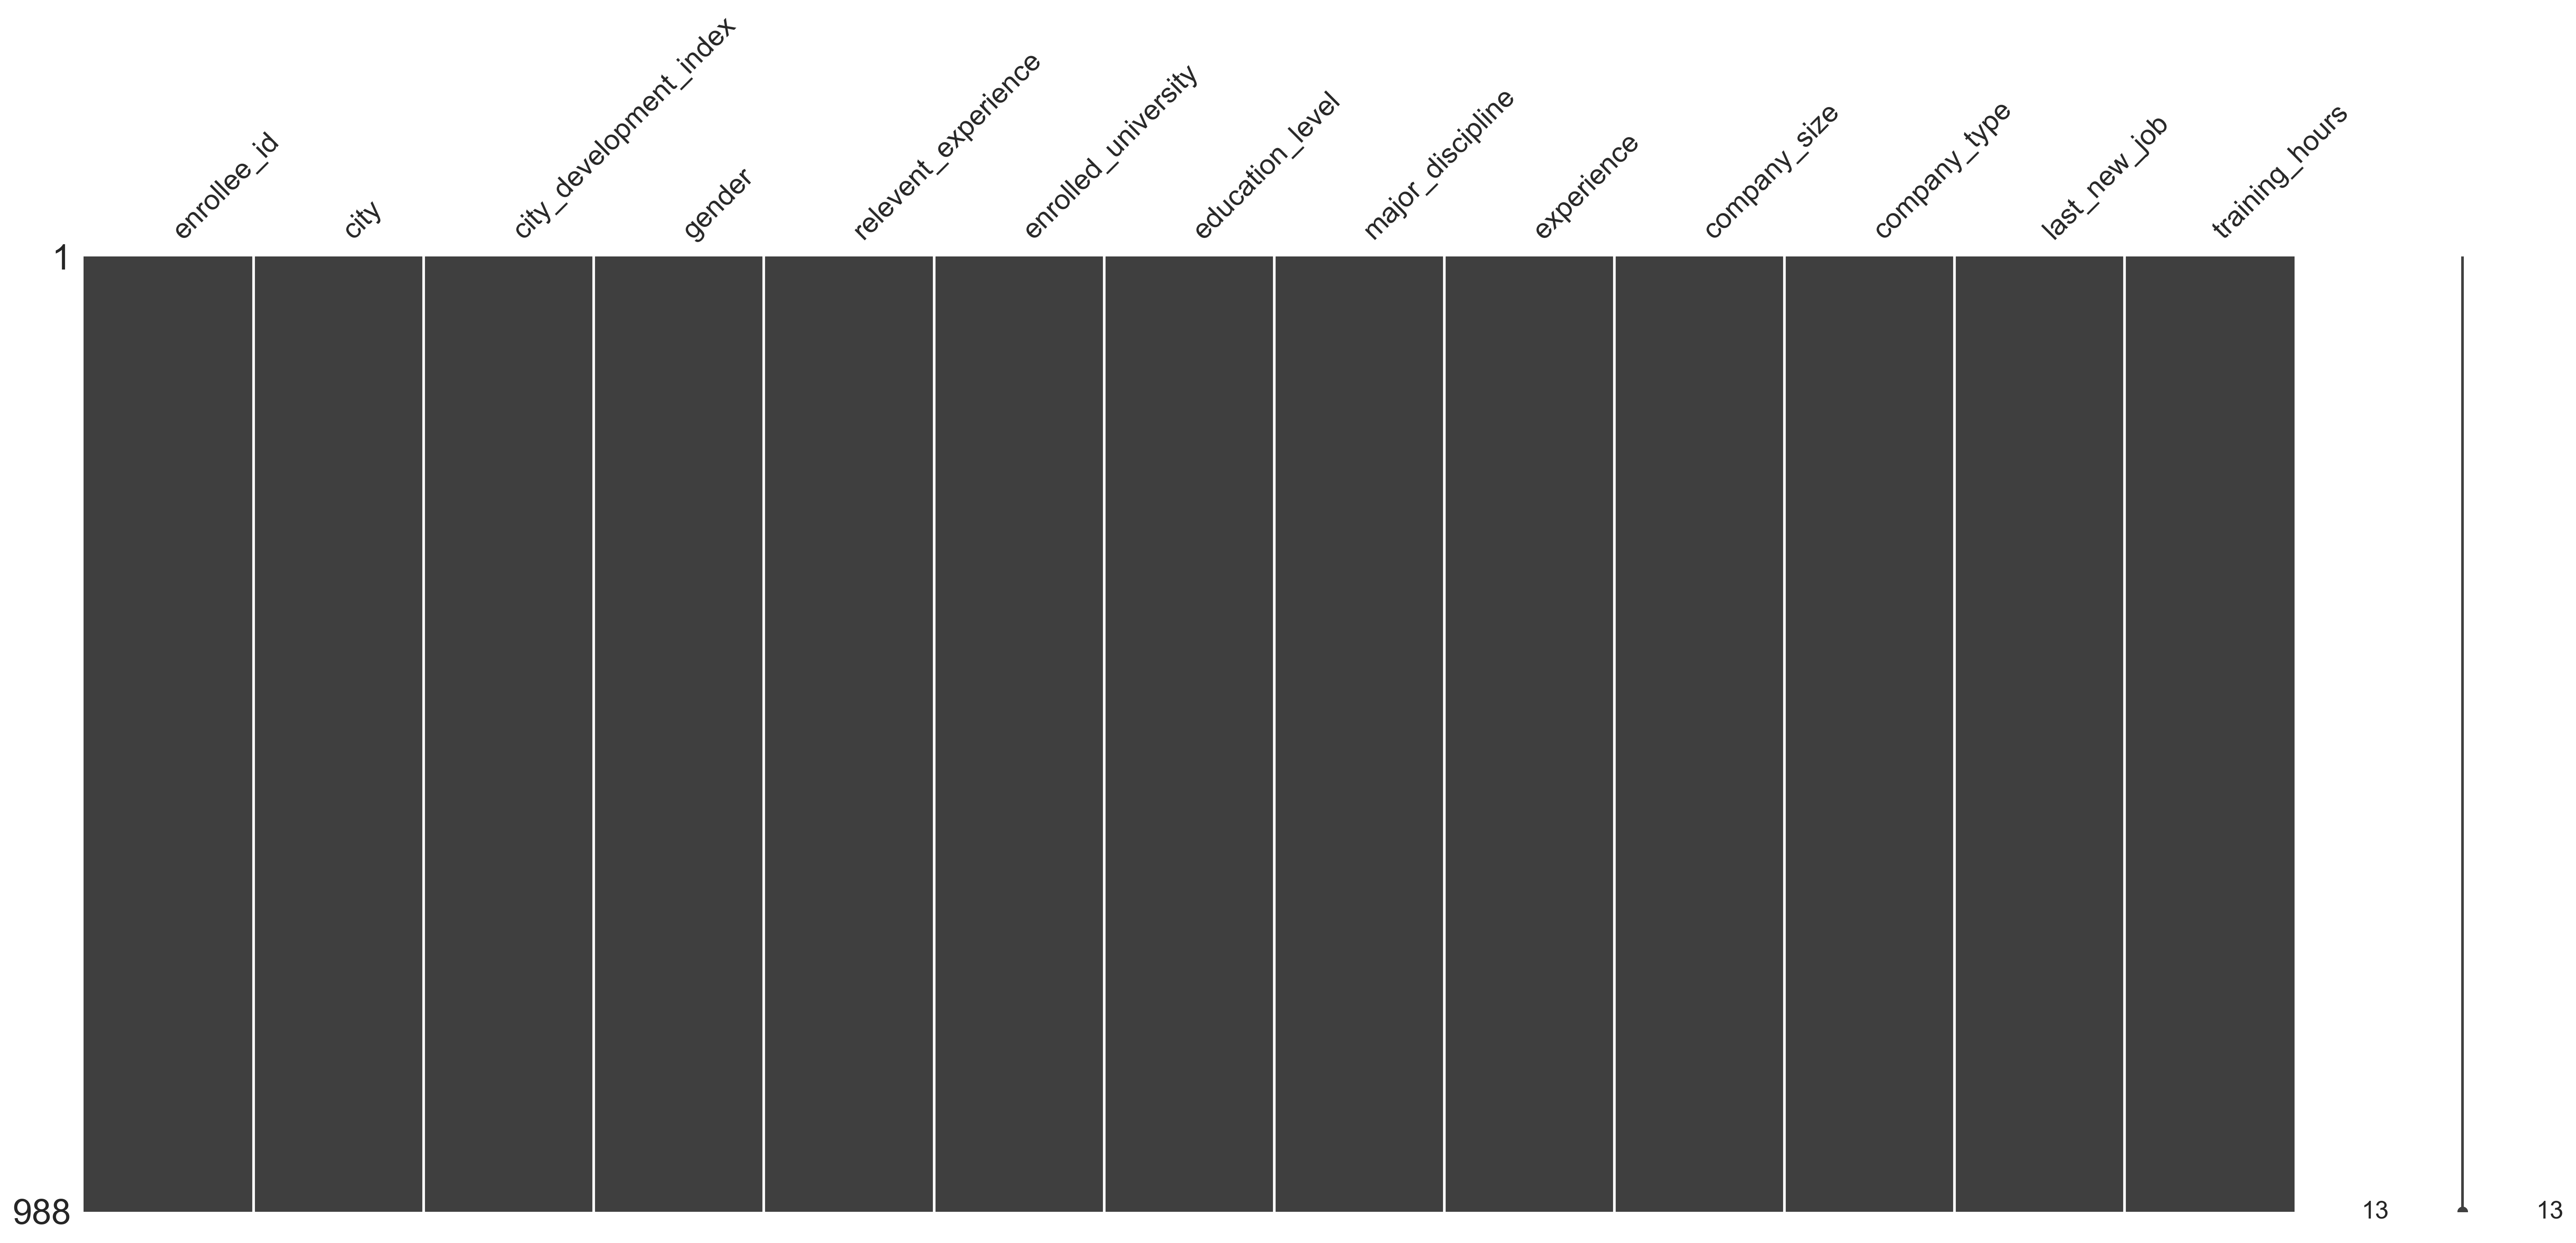

In [24]:
msno.matrix(data)
plt.show()

The data seems to be clean now and the missing values have filled by the values as per the probability distribution or the mode of the feature.

In [25]:
data.to_csv('clean_data.csv')

In [26]:
# categorical features
x=['gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type']

## **DATA VISUALISATION**

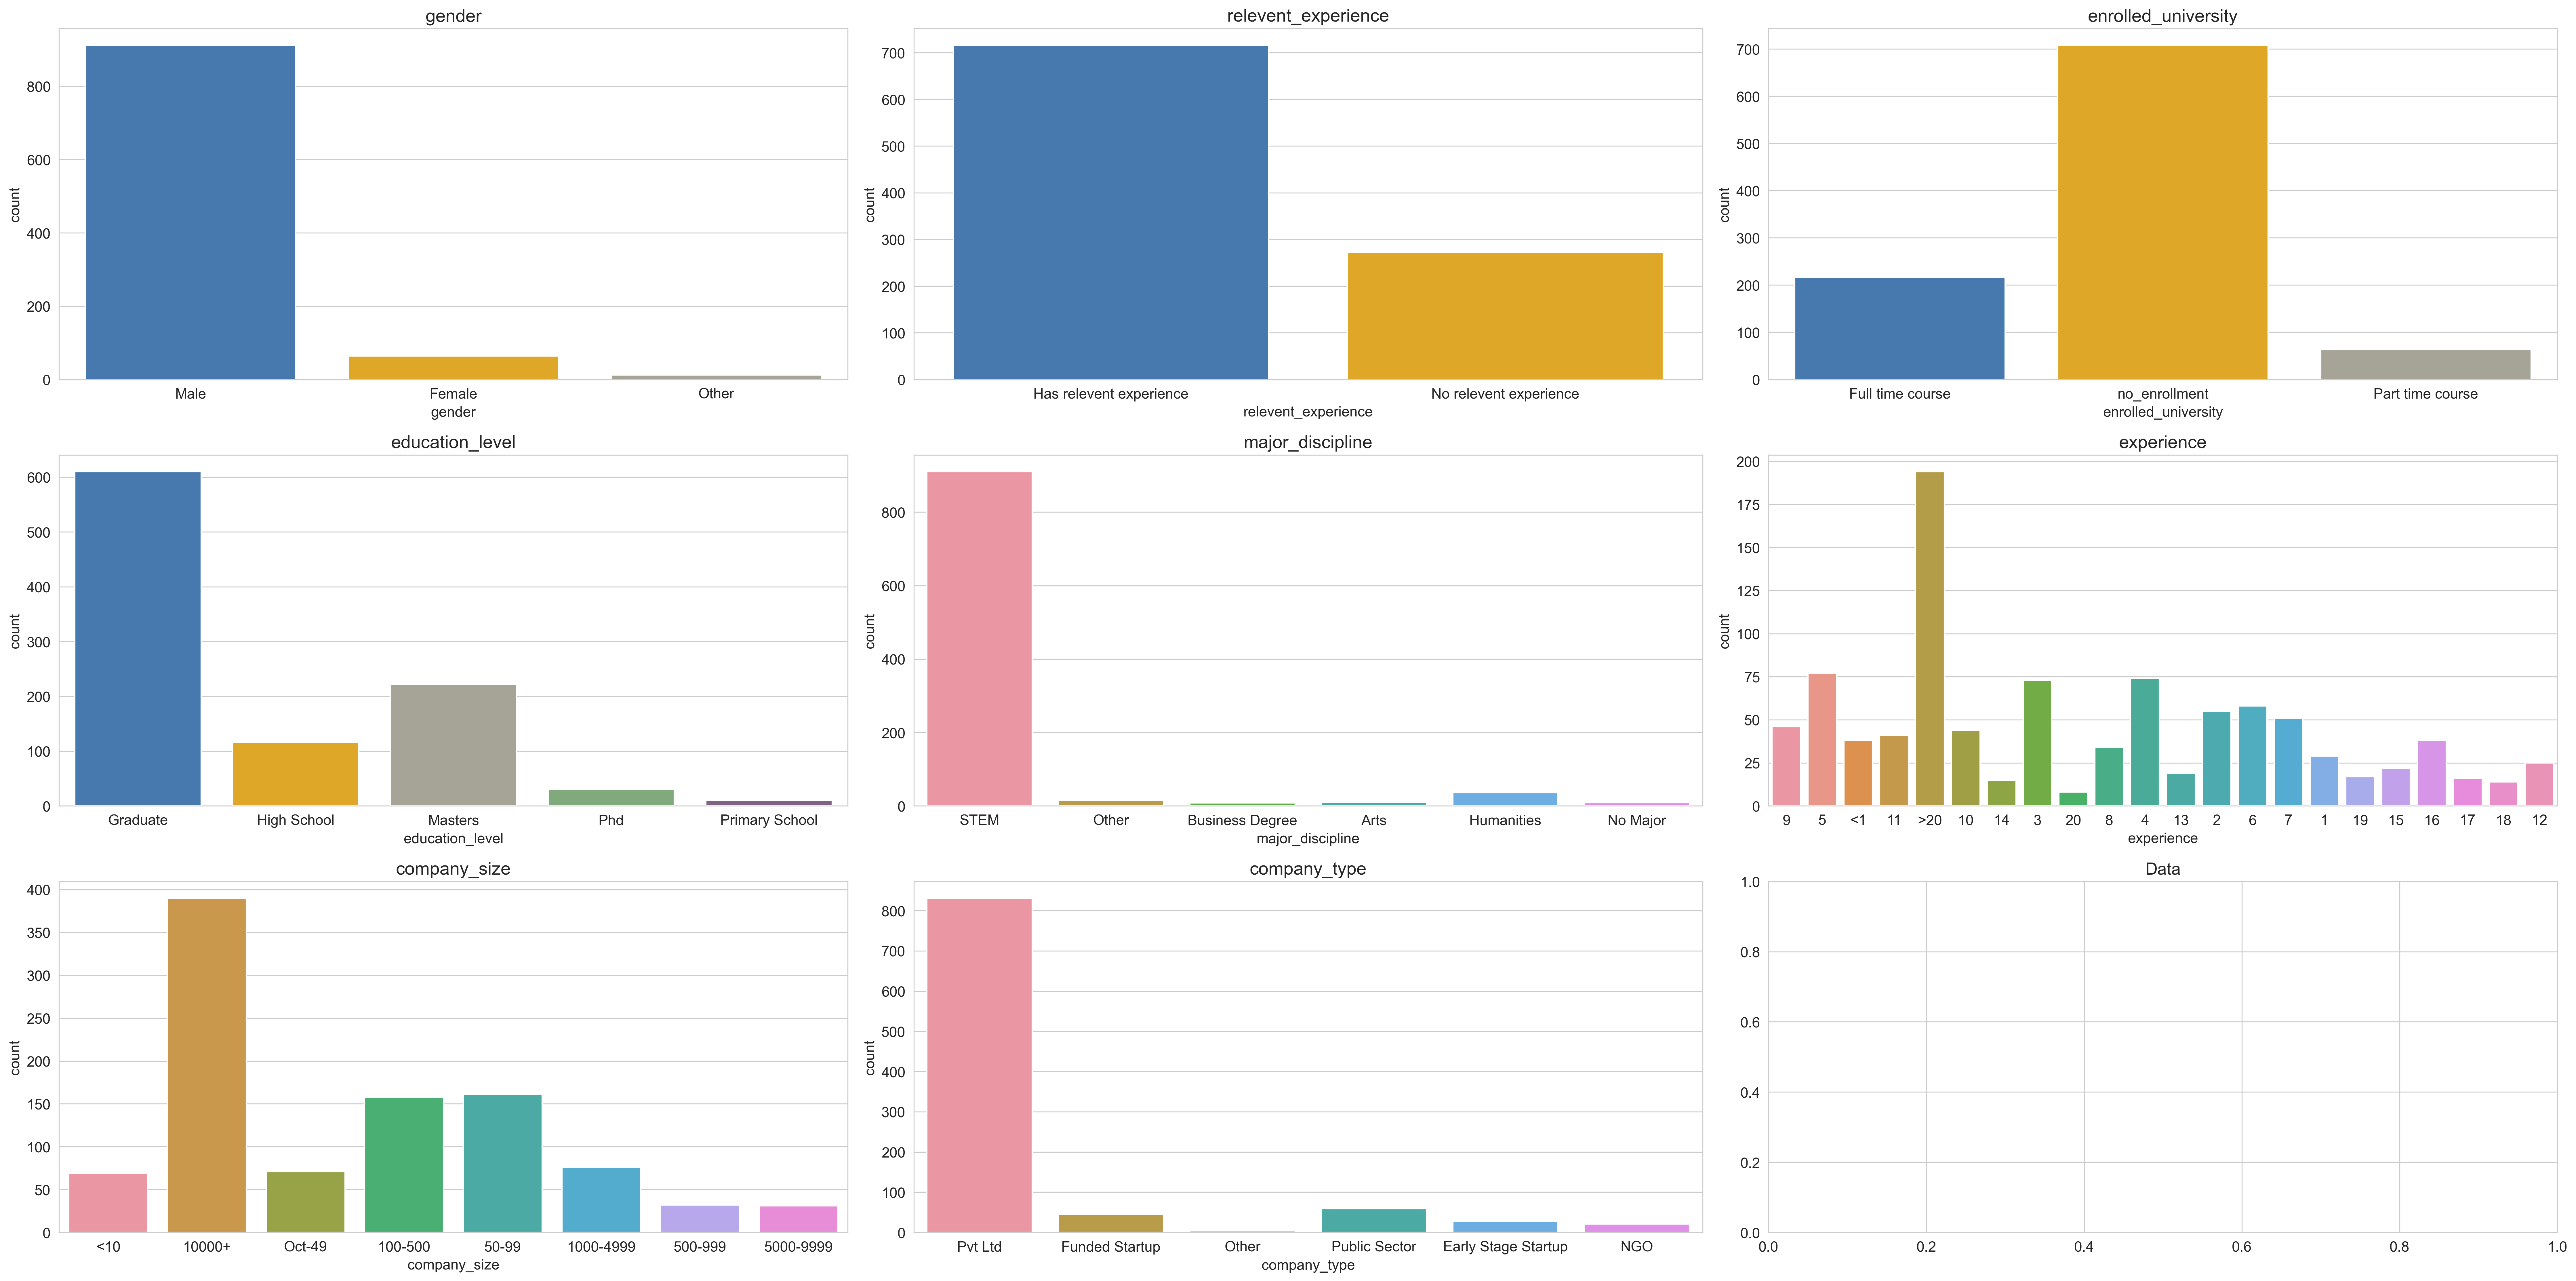

In [27]:
fig, ax = plt.subplots(3,3, figsize=(30, 15))
for i in range(8): 
    sns.countplot(x[i], data= data, ax=ax[i//3][i%3])
    ax[i//3][i%3].set_title(x[i], fontsize=15)
    plt.tight_layout()
plt.title("Data")
plt.show()

From the above figure, we can say that the data contains much more instances of Male candidates, graduate candidates, employees working in small companies and private companies, candidates with major discipline being STEM and most of them did not enroll in any university. 

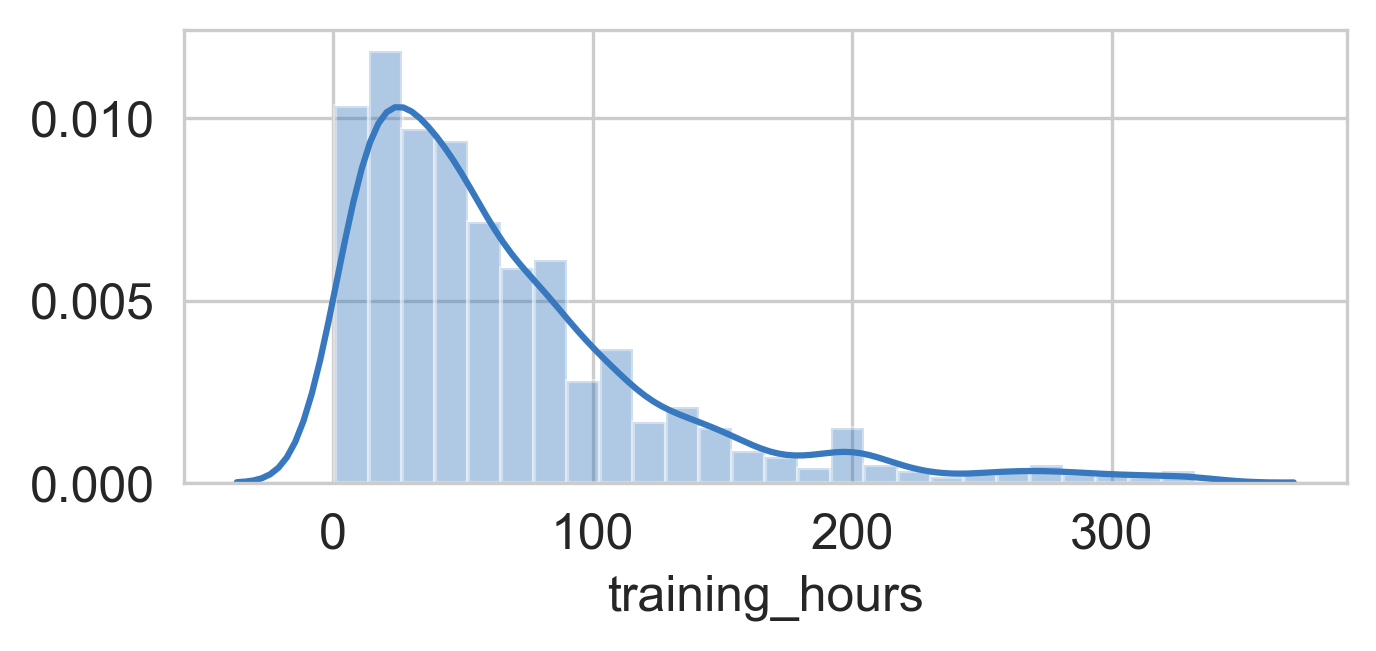

In [28]:
plt.figure(figsize=(5,2))
sns.distplot(data.training_hours)
plt.rc('font', size=10) 
plt.rc('axes', titlesize=10)
plt.rc('axes', labelsize=10) 

The above curve is the normal distribution curve of the working hours employed the individuals.

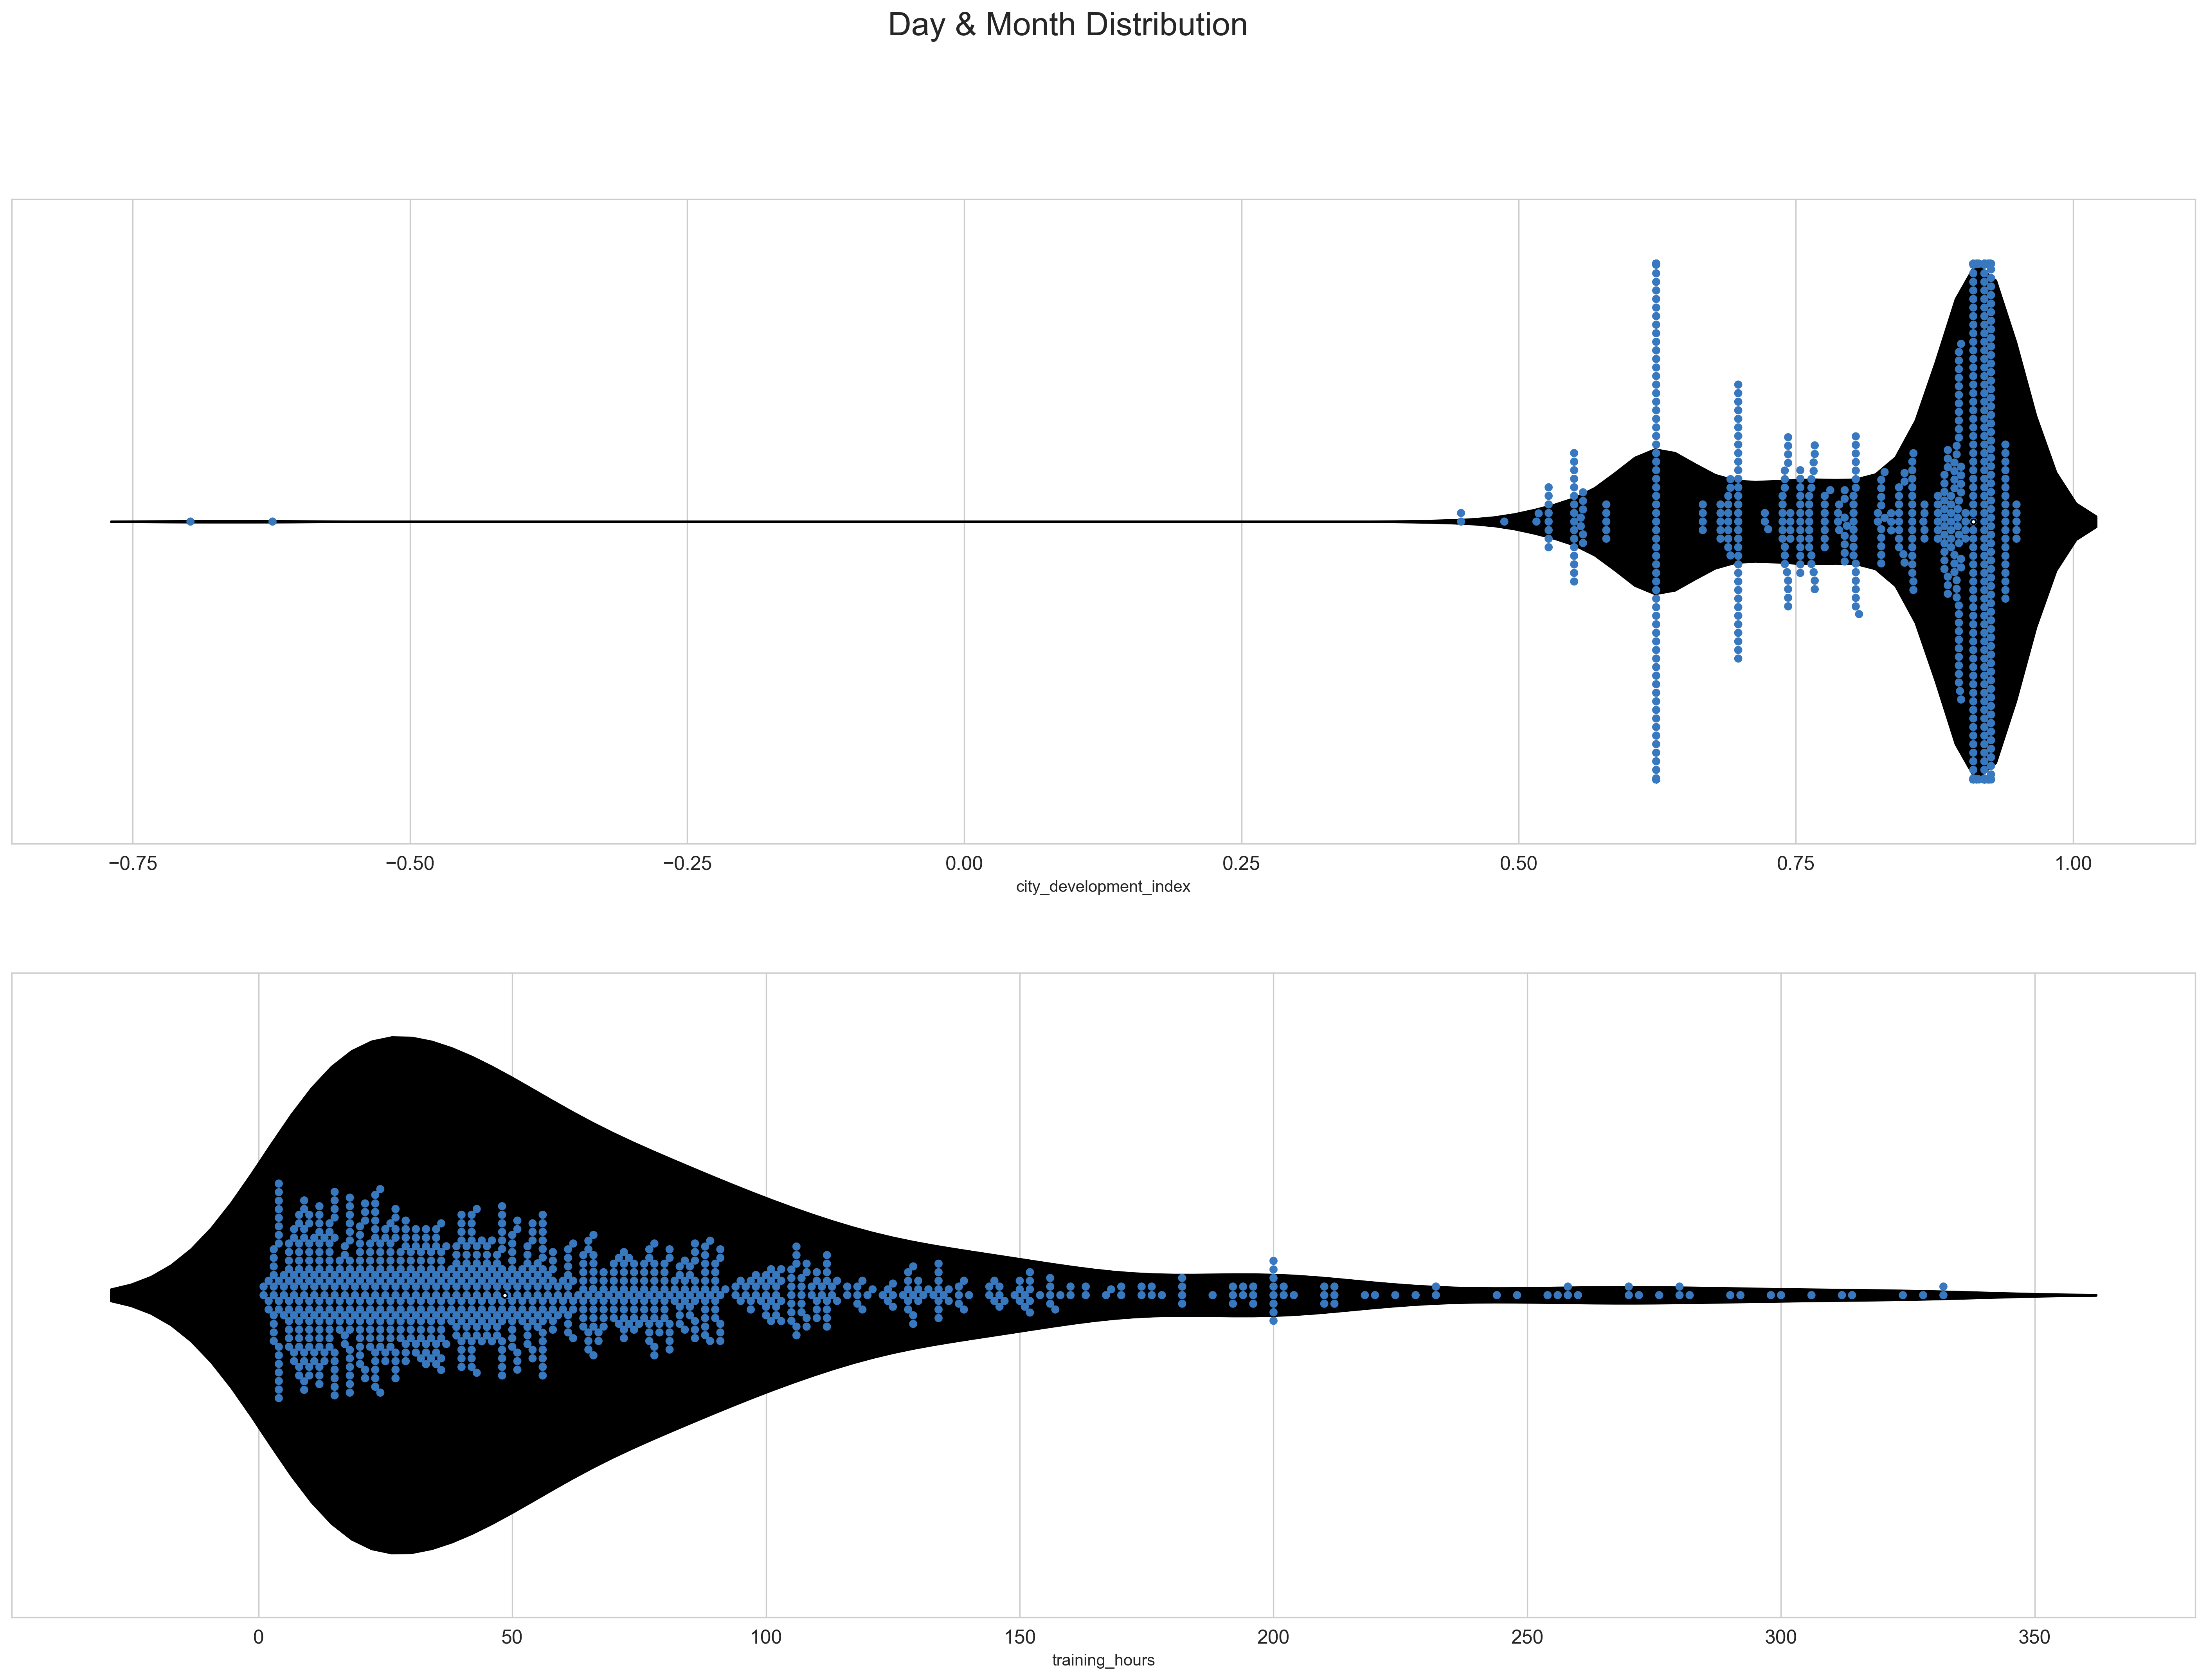

In [29]:
# numerical features
xx=['city_development_index','training_hours']
fig, ax = plt.subplots(2,1, figsize=(24, 16))
sns.swarmplot('city_development_index', data= data, ax=ax[0])
sns.swarmplot('training_hours', data= data, ax=ax[1])
sns.violinplot('city_development_index', data= data,alpha = 0.6,color='k', ax=ax[0])
sns.violinplot('training_hours', data= data,alpha = 0.6,color='k' ,ax=ax[1])
fig.suptitle("Day & Month Distribution", fontsize=20)
plt.show()

Above plots show that city development index varies mainly in the range of 0.5 to 1 with maximum cities having development index near to 1. Also, the average training hours are ~25 hrs.

In [30]:
abc=data.groupby('last_new_job')

In [31]:
def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("last_new_job vs {}-feedback -  Modcloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('last_new_job', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)
    
def norm_counts(t):
    norms = np.linalg.norm(t.fillna(0), axis=1)
    t_norm = t[0:0]
    for row, euc in zip(t.iterrows(), norms):
        t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
    return t_norm

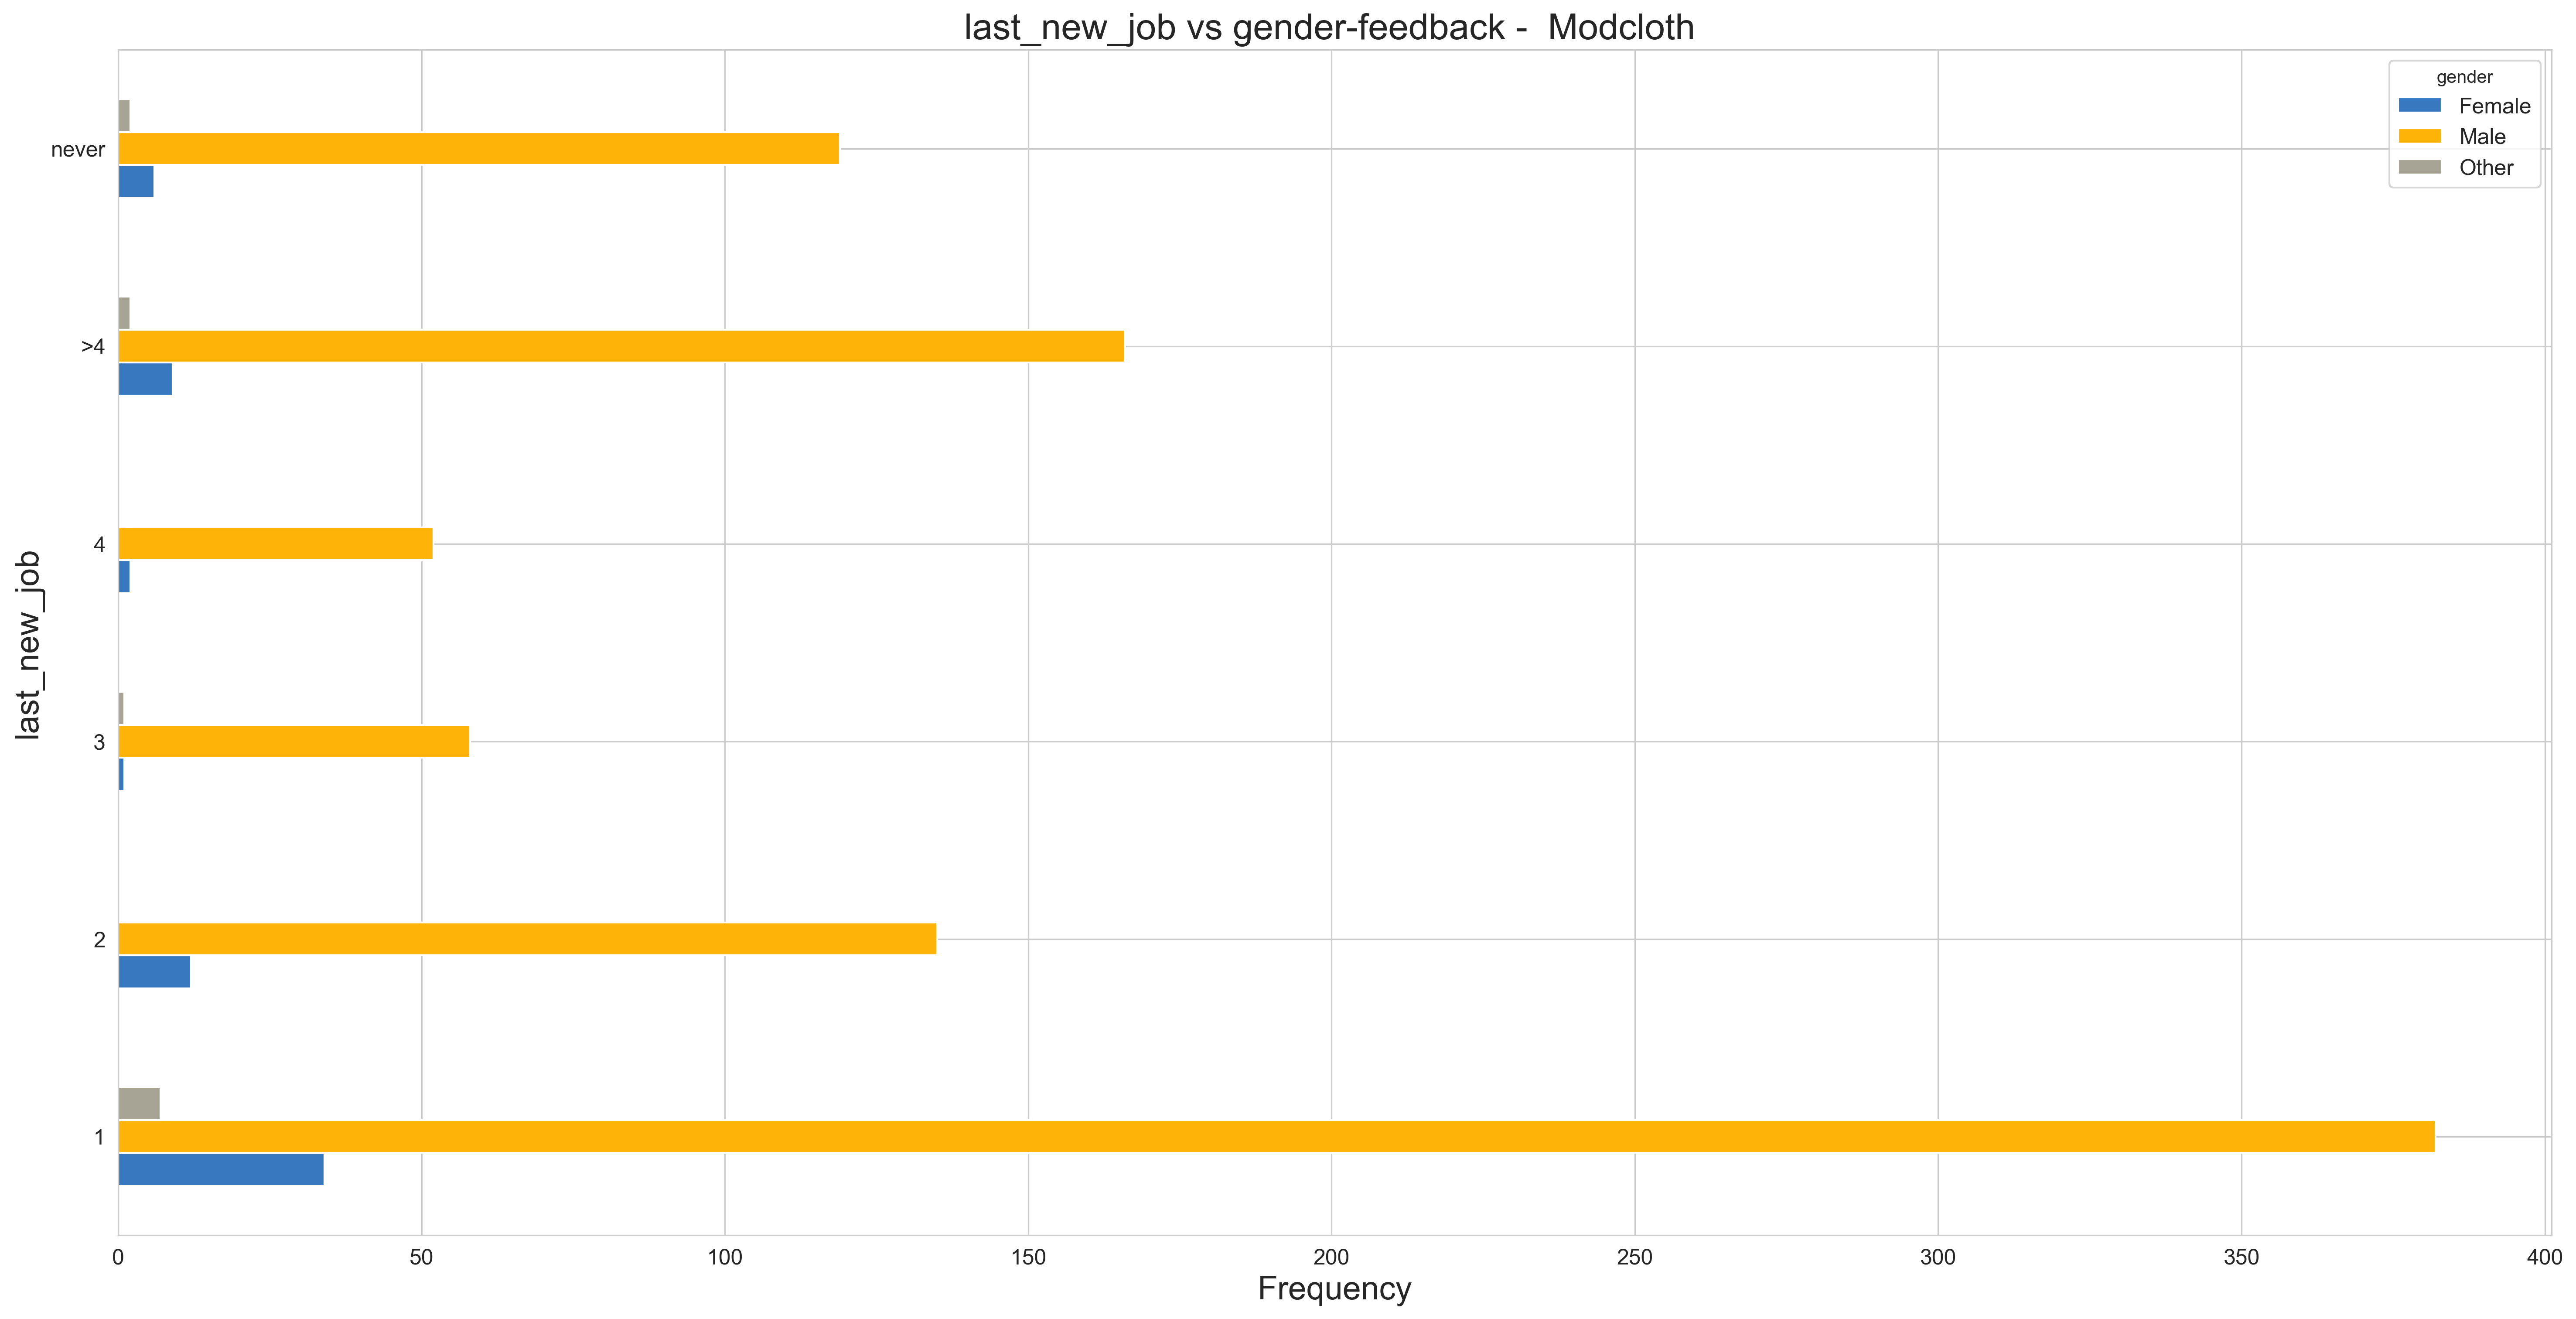

In [32]:
cat_fit=abc['gender'].value_counts()
cat_fit = cat_fit.unstack()
cat_fit_norm = norm_counts(cat_fit)
plot_barh(cat_fit, 'gender')

The Plot shows that :<br/>
1. The probability of a candidate with gender "other" falling under the catagory of 2 and 4 is nearly 0.
2. We cannot classify solely on the basis of gender attribute.

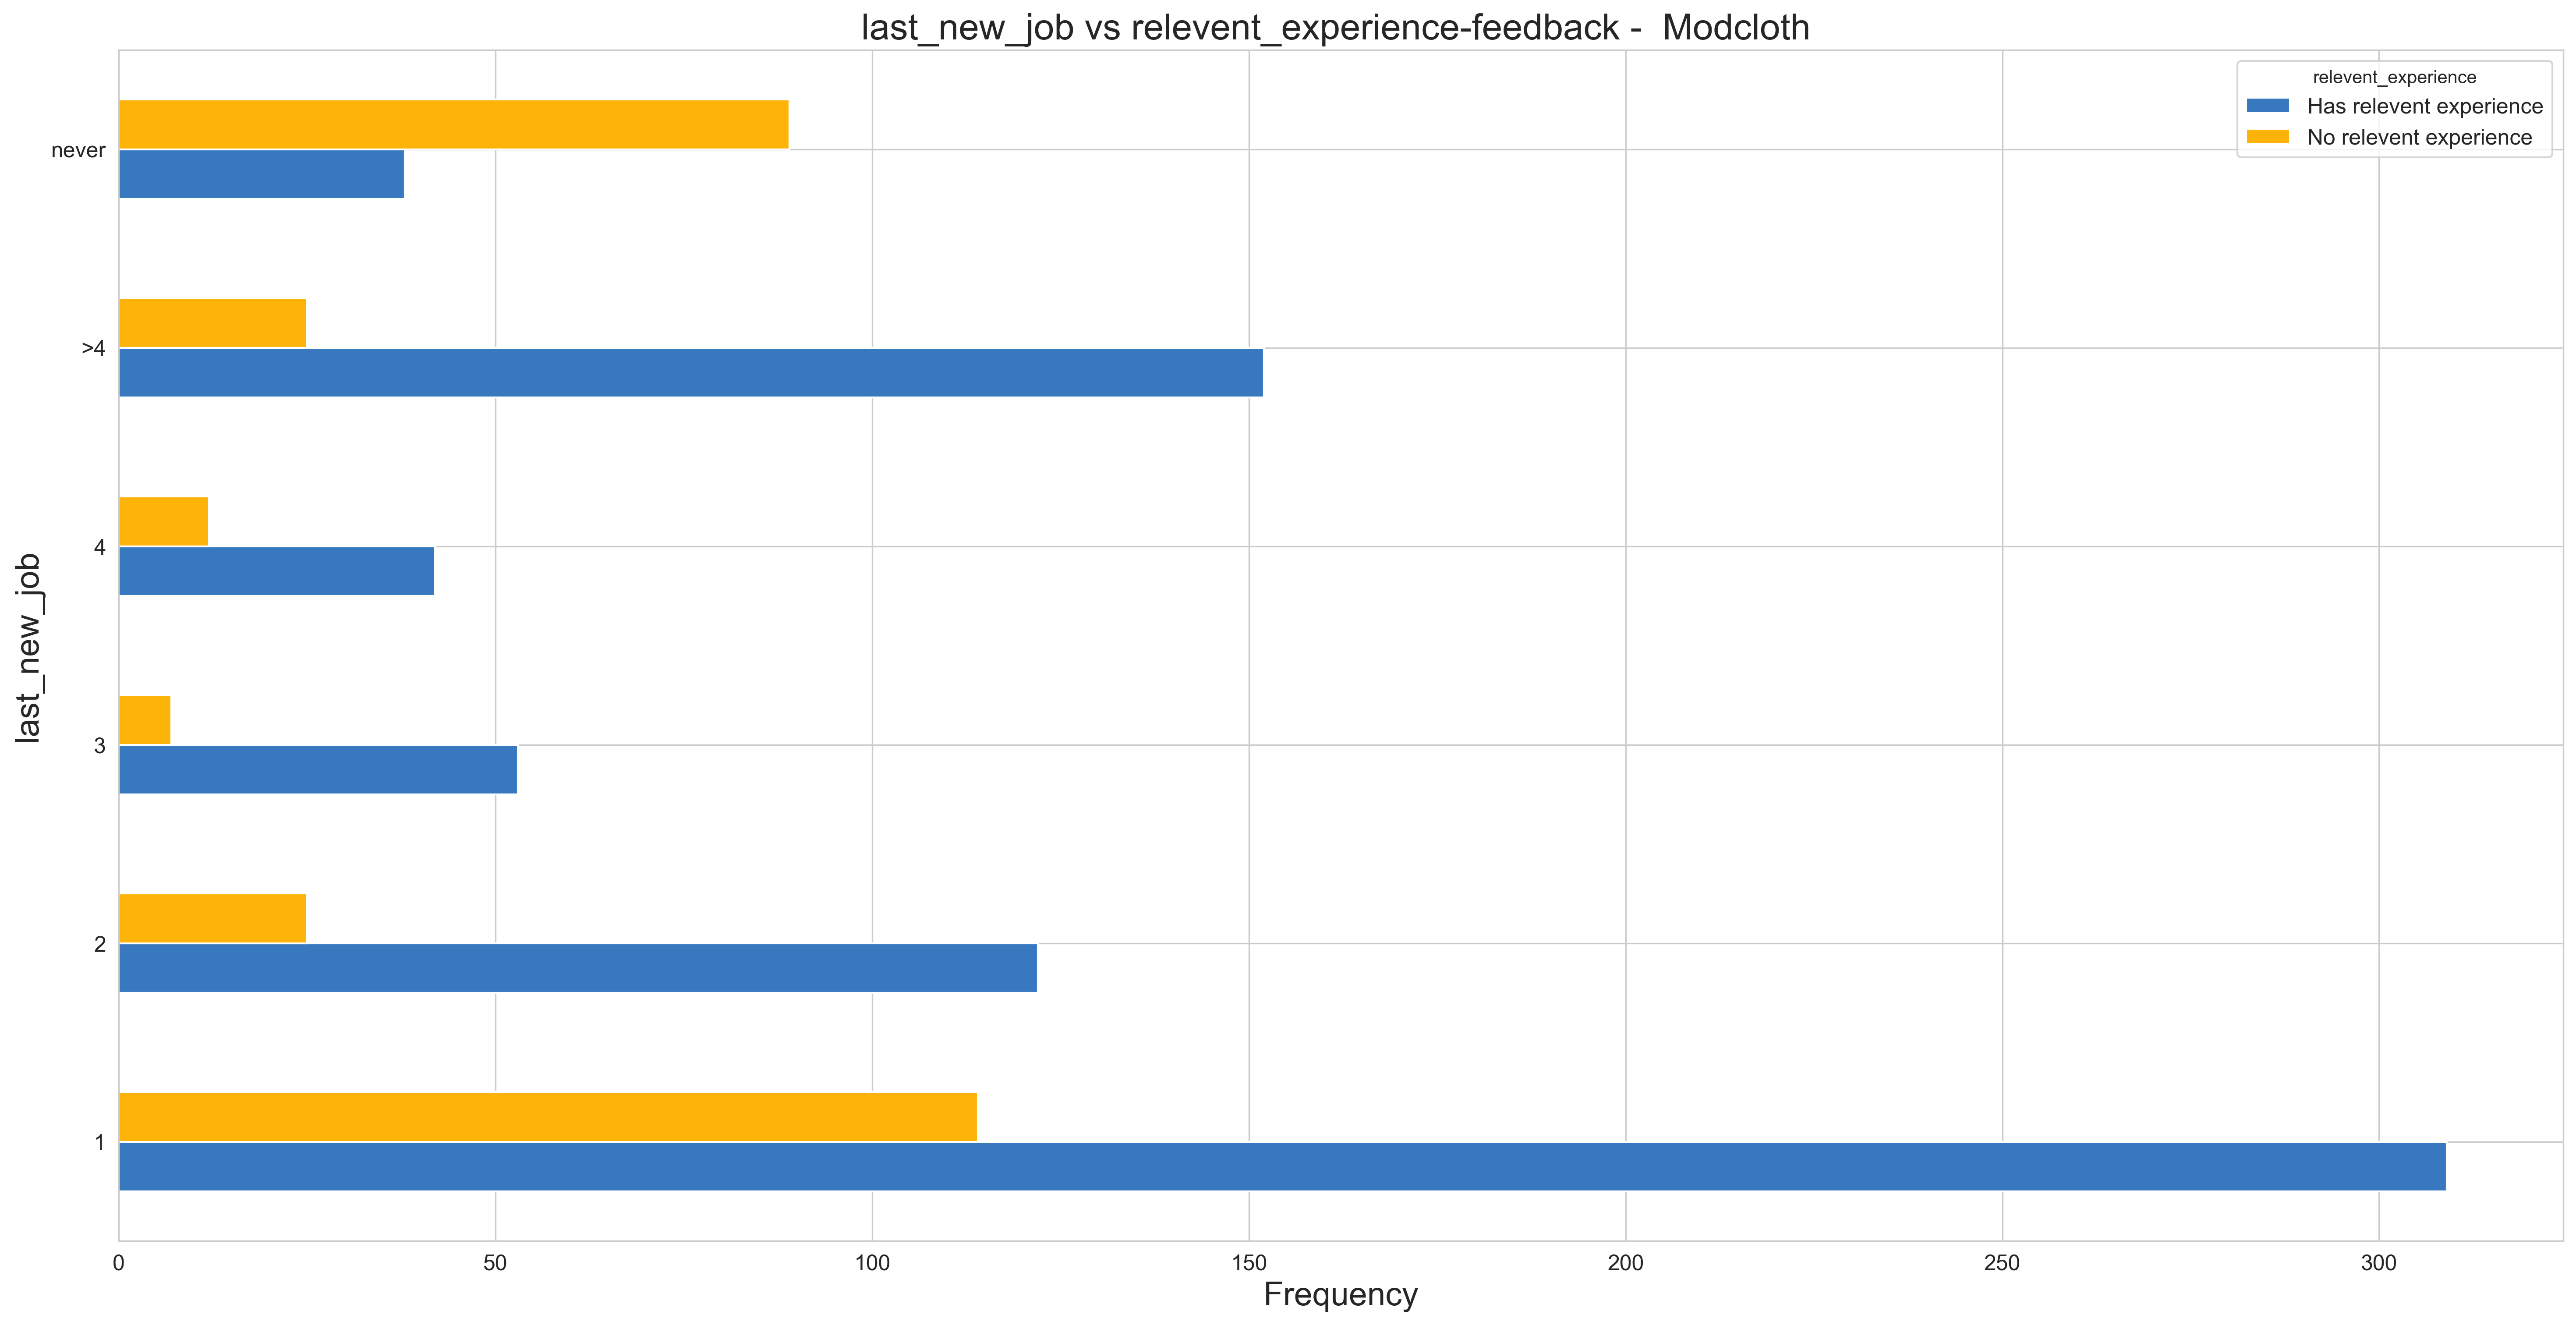

In [33]:
cat_fit=abc['relevent_experience'].value_counts()
cat_fit = cat_fit.unstack()
cat_fit_norm = norm_counts(cat_fit)
plot_barh(cat_fit, 'relevent_experience')

From above plot, we can say that experience is a very important metric to decide last new job. The candidates having experience are less likely to search for new jobs.

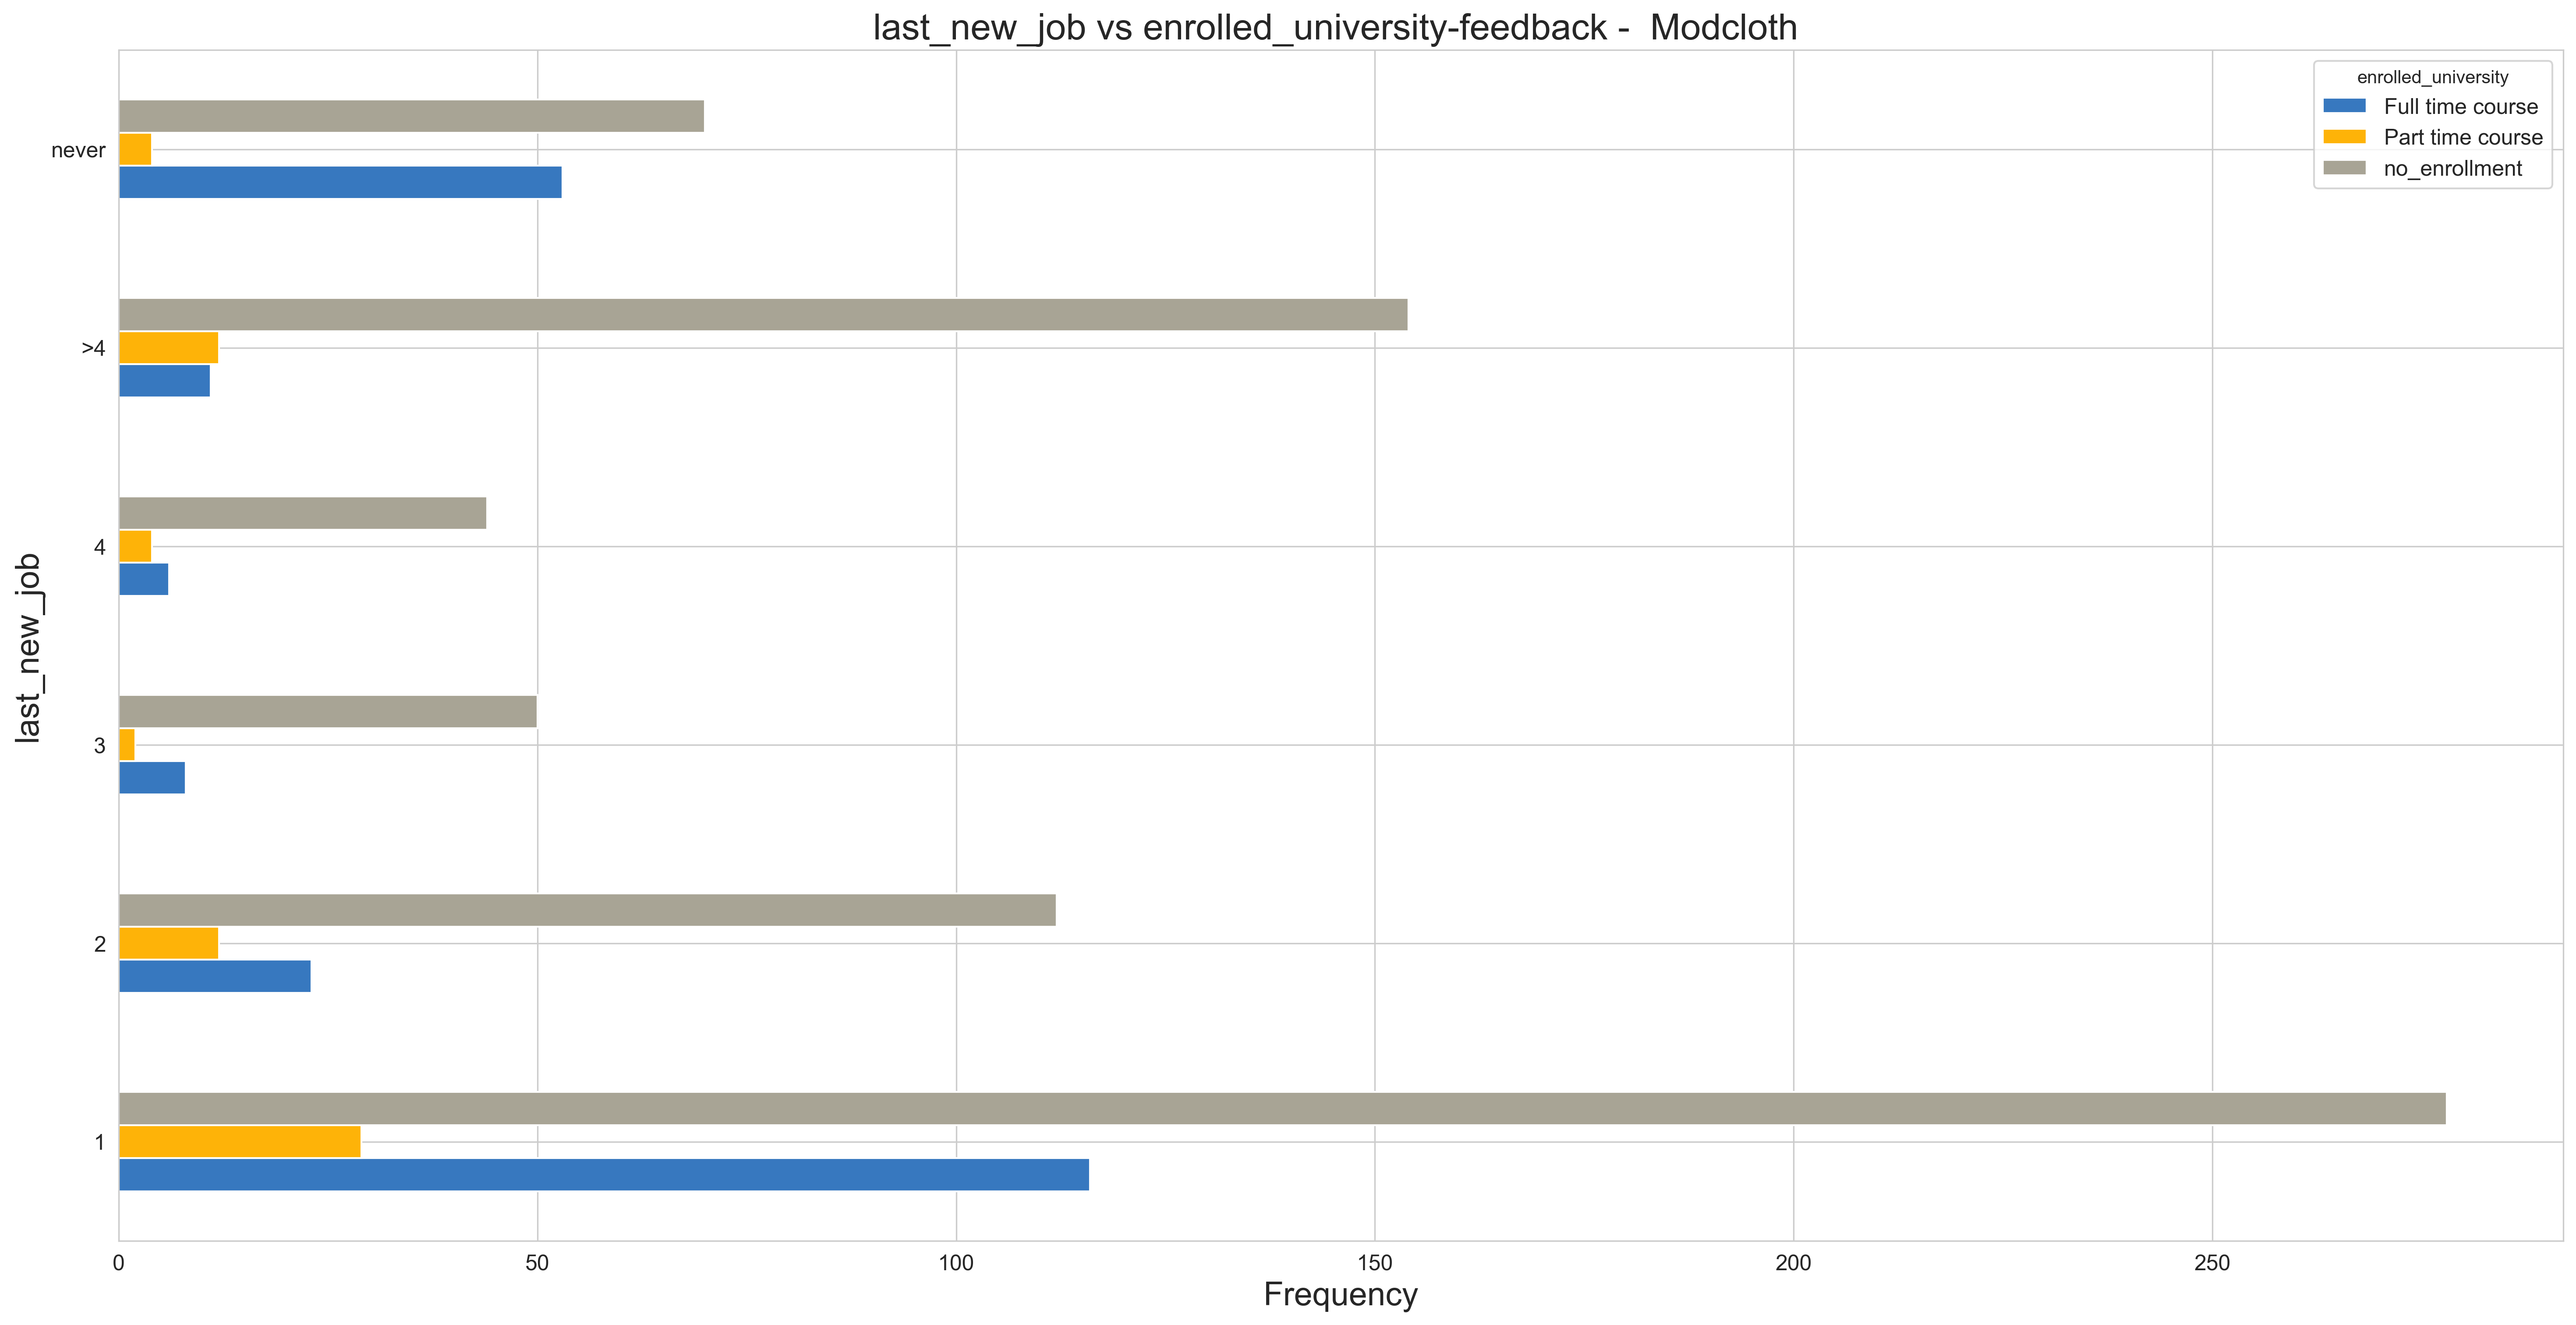

In [34]:
cat_fit=abc['enrolled_university'].value_counts()
cat_fit = cat_fit.unstack()
cat_fit_norm = norm_counts(cat_fit)
plot_barh(cat_fit, 'enrolled_university')

Here also we can clearly see that the people who either have complete university enrollment or none at all have had last new job experience and due to their population being so high they are also the ones in majority when it comes to no experience.

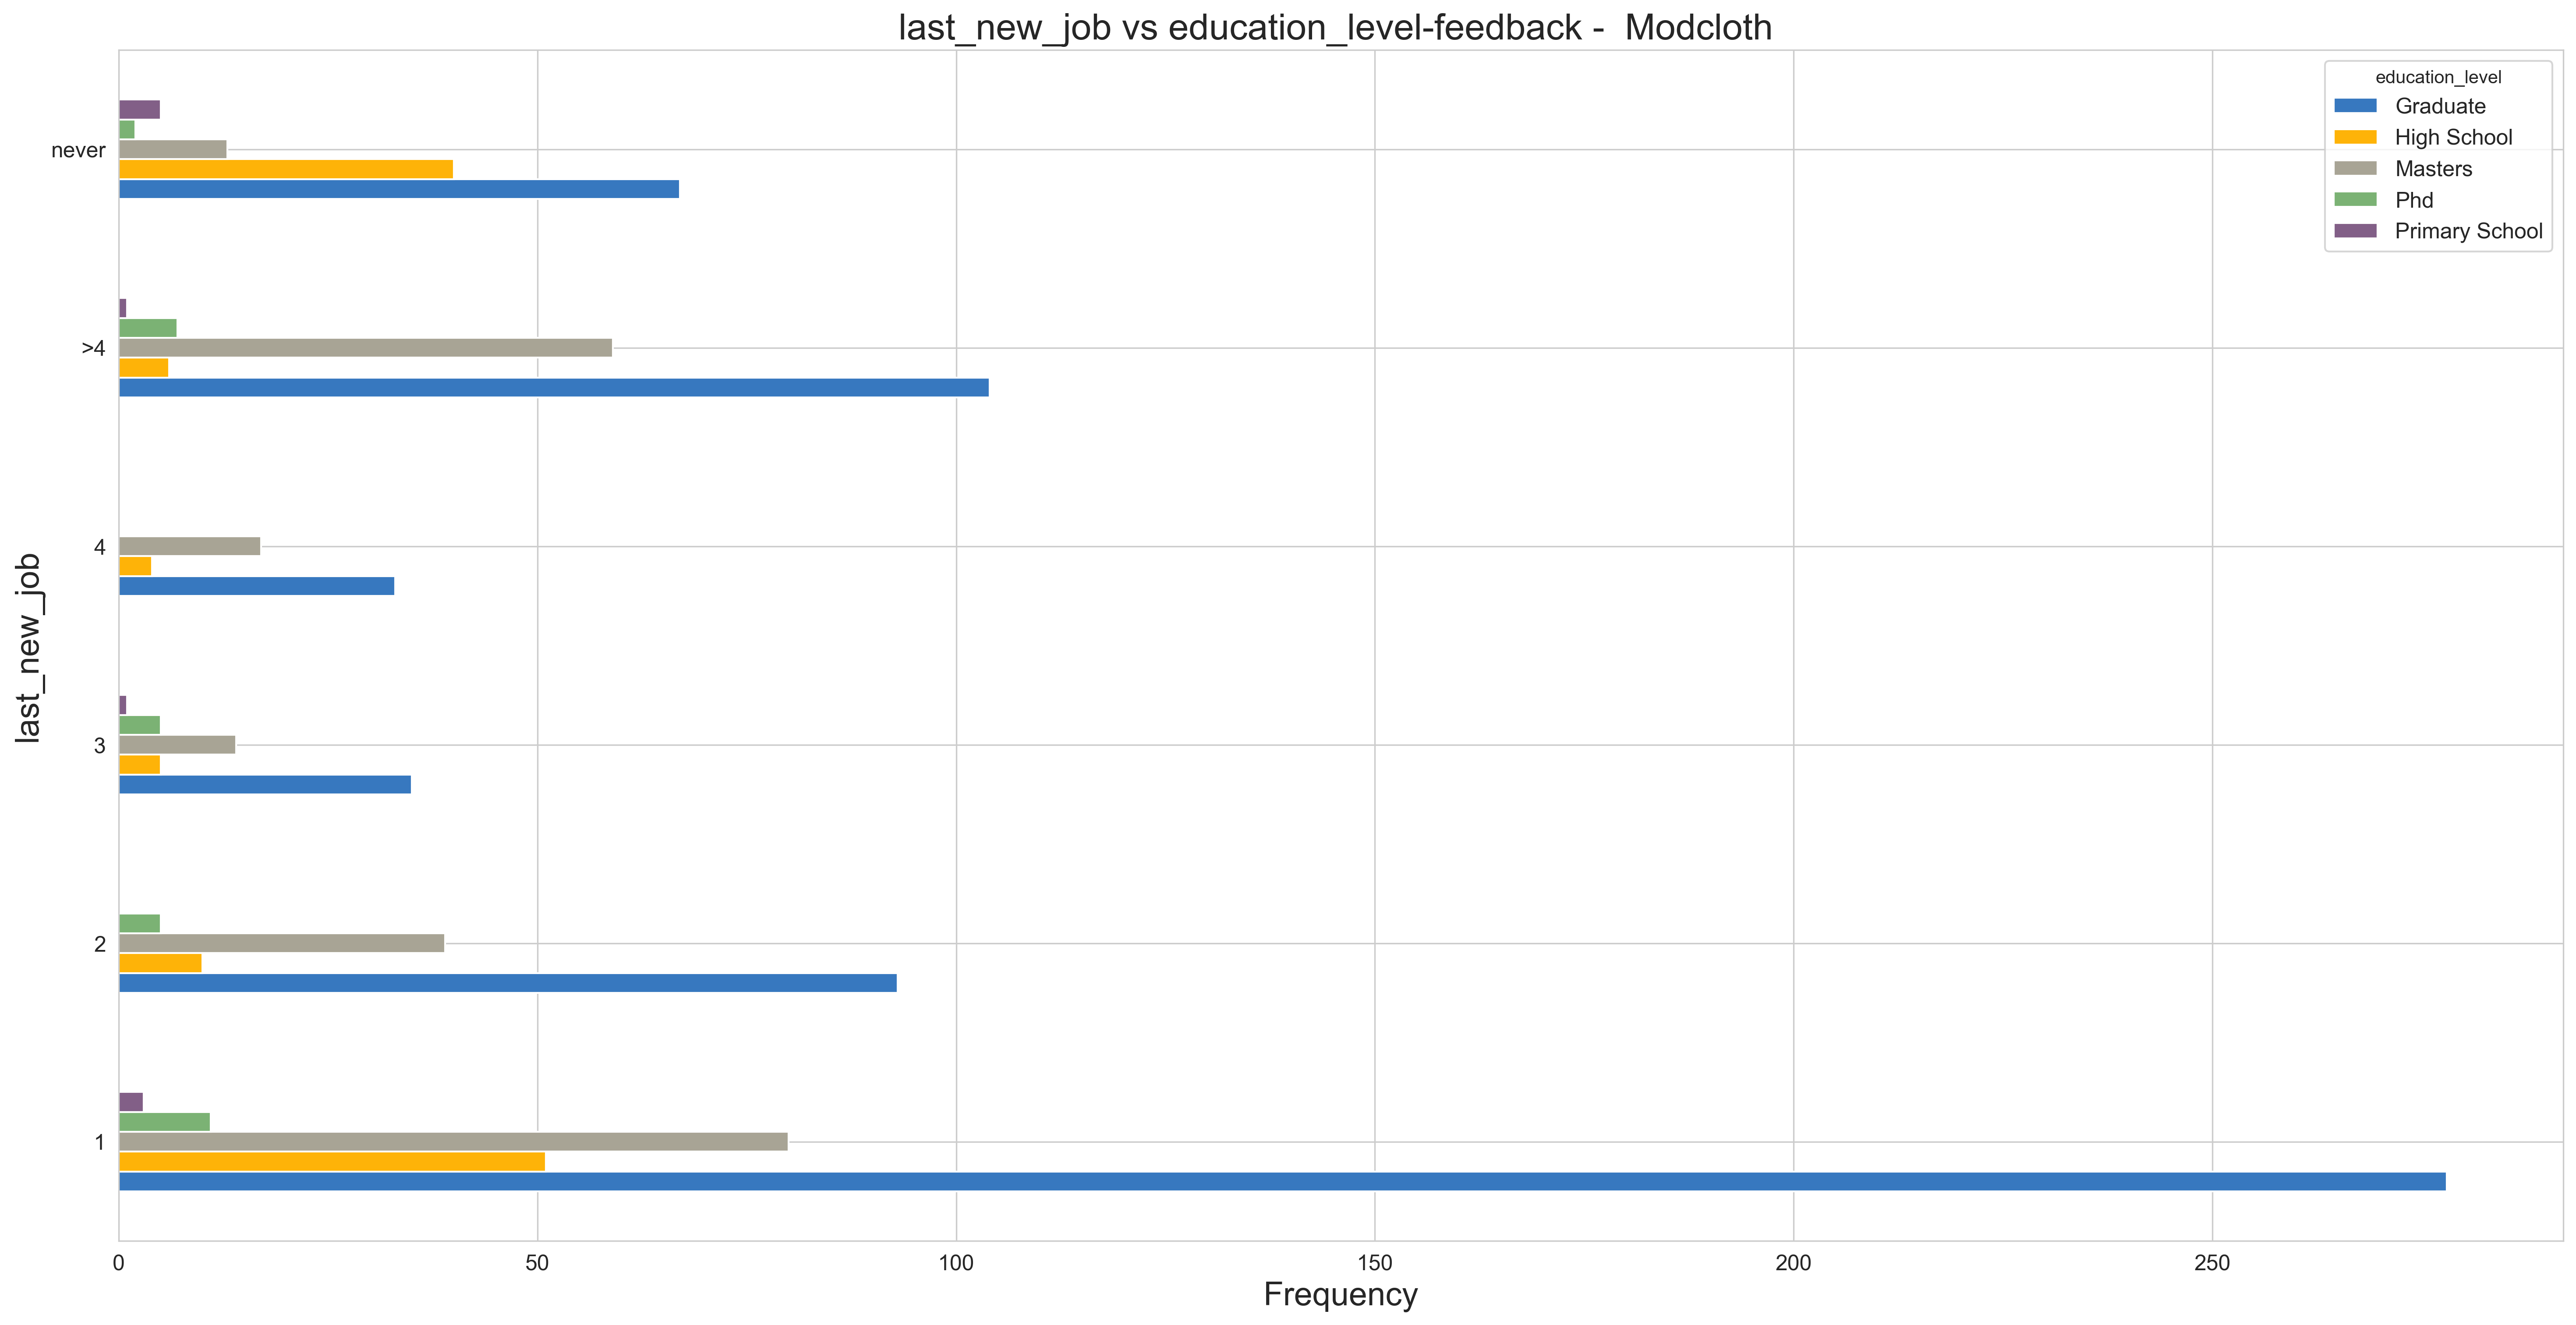

In [35]:
cat_fit=abc['education_level'].value_counts()
cat_fit = cat_fit.unstack()
cat_fit_norm = norm_counts(cat_fit)
plot_barh(cat_fit, 'education_level')

Freshly Graduates are dominating the proceddings here as it is clearly visible

From the last two plots, it is clear that the candidates with nearly no experience and low education level would likely to fall under the "never" catagory.

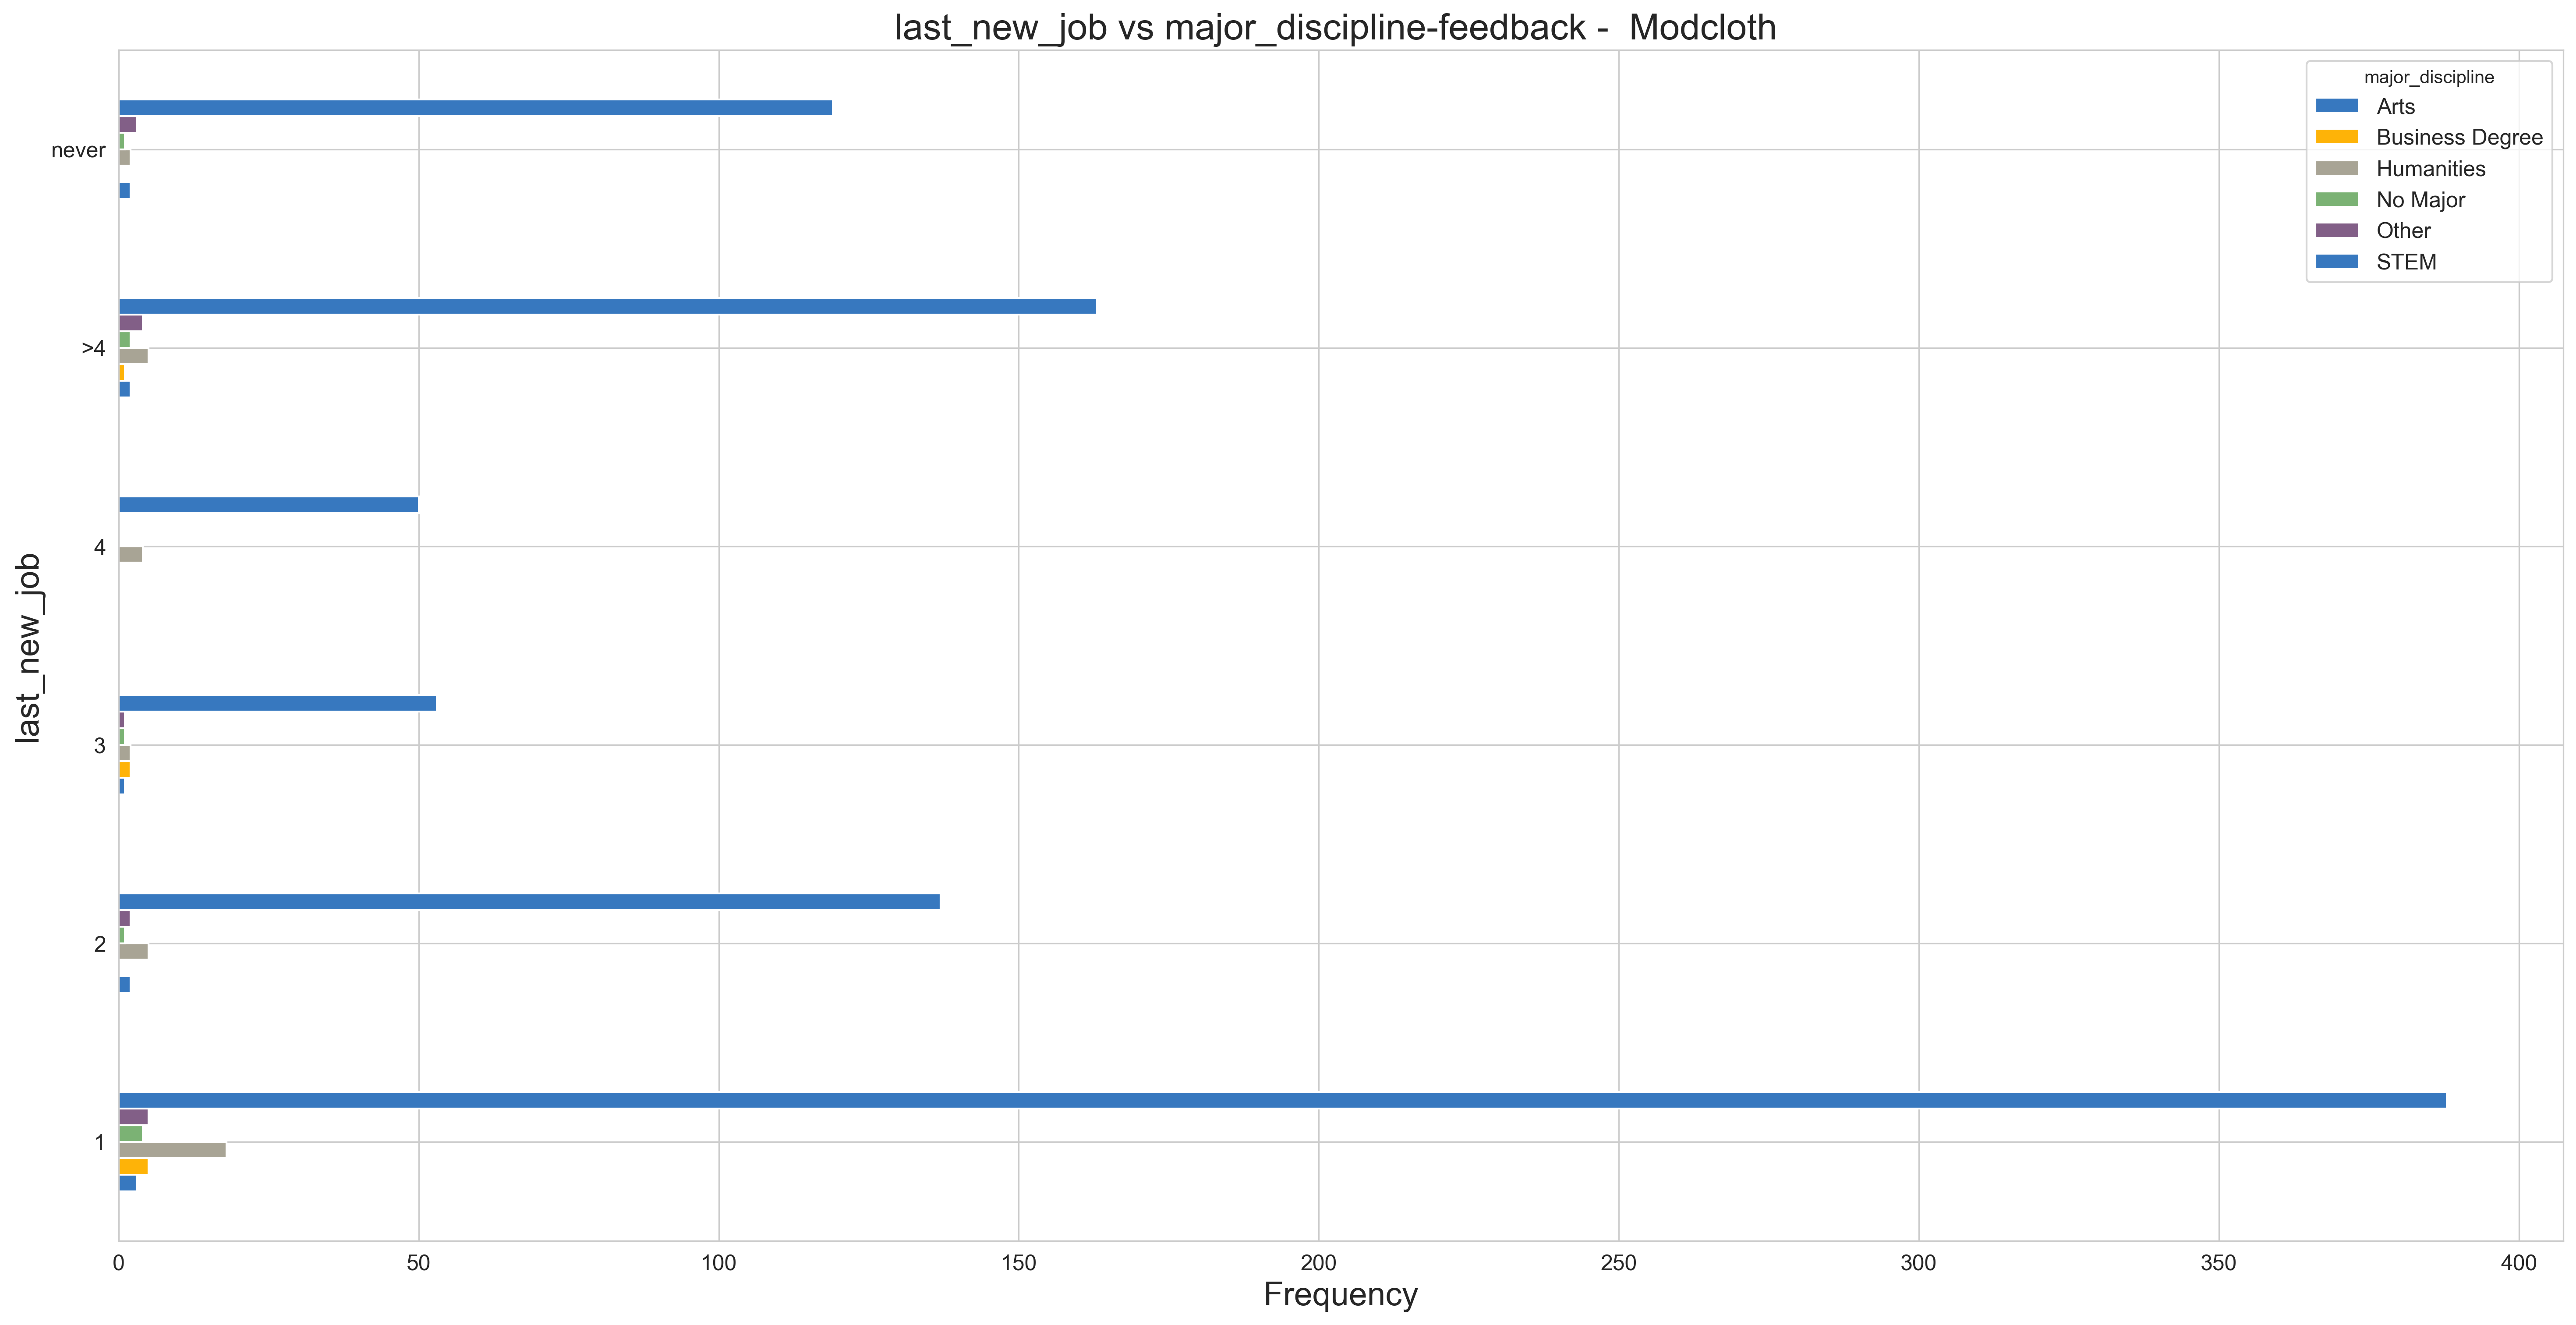

In [36]:
cat_fit=abc['major_discipline'].value_counts()
cat_fit = cat_fit.unstack()
cat_fit_norm = norm_counts(cat_fit)
plot_barh(cat_fit, 'major_discipline')

Since the data contained an overwhelming number of people with STEM background so it is almost impossible for other stream people to be properly represented through the given dataset. Although humanities people also have some say in last new job.

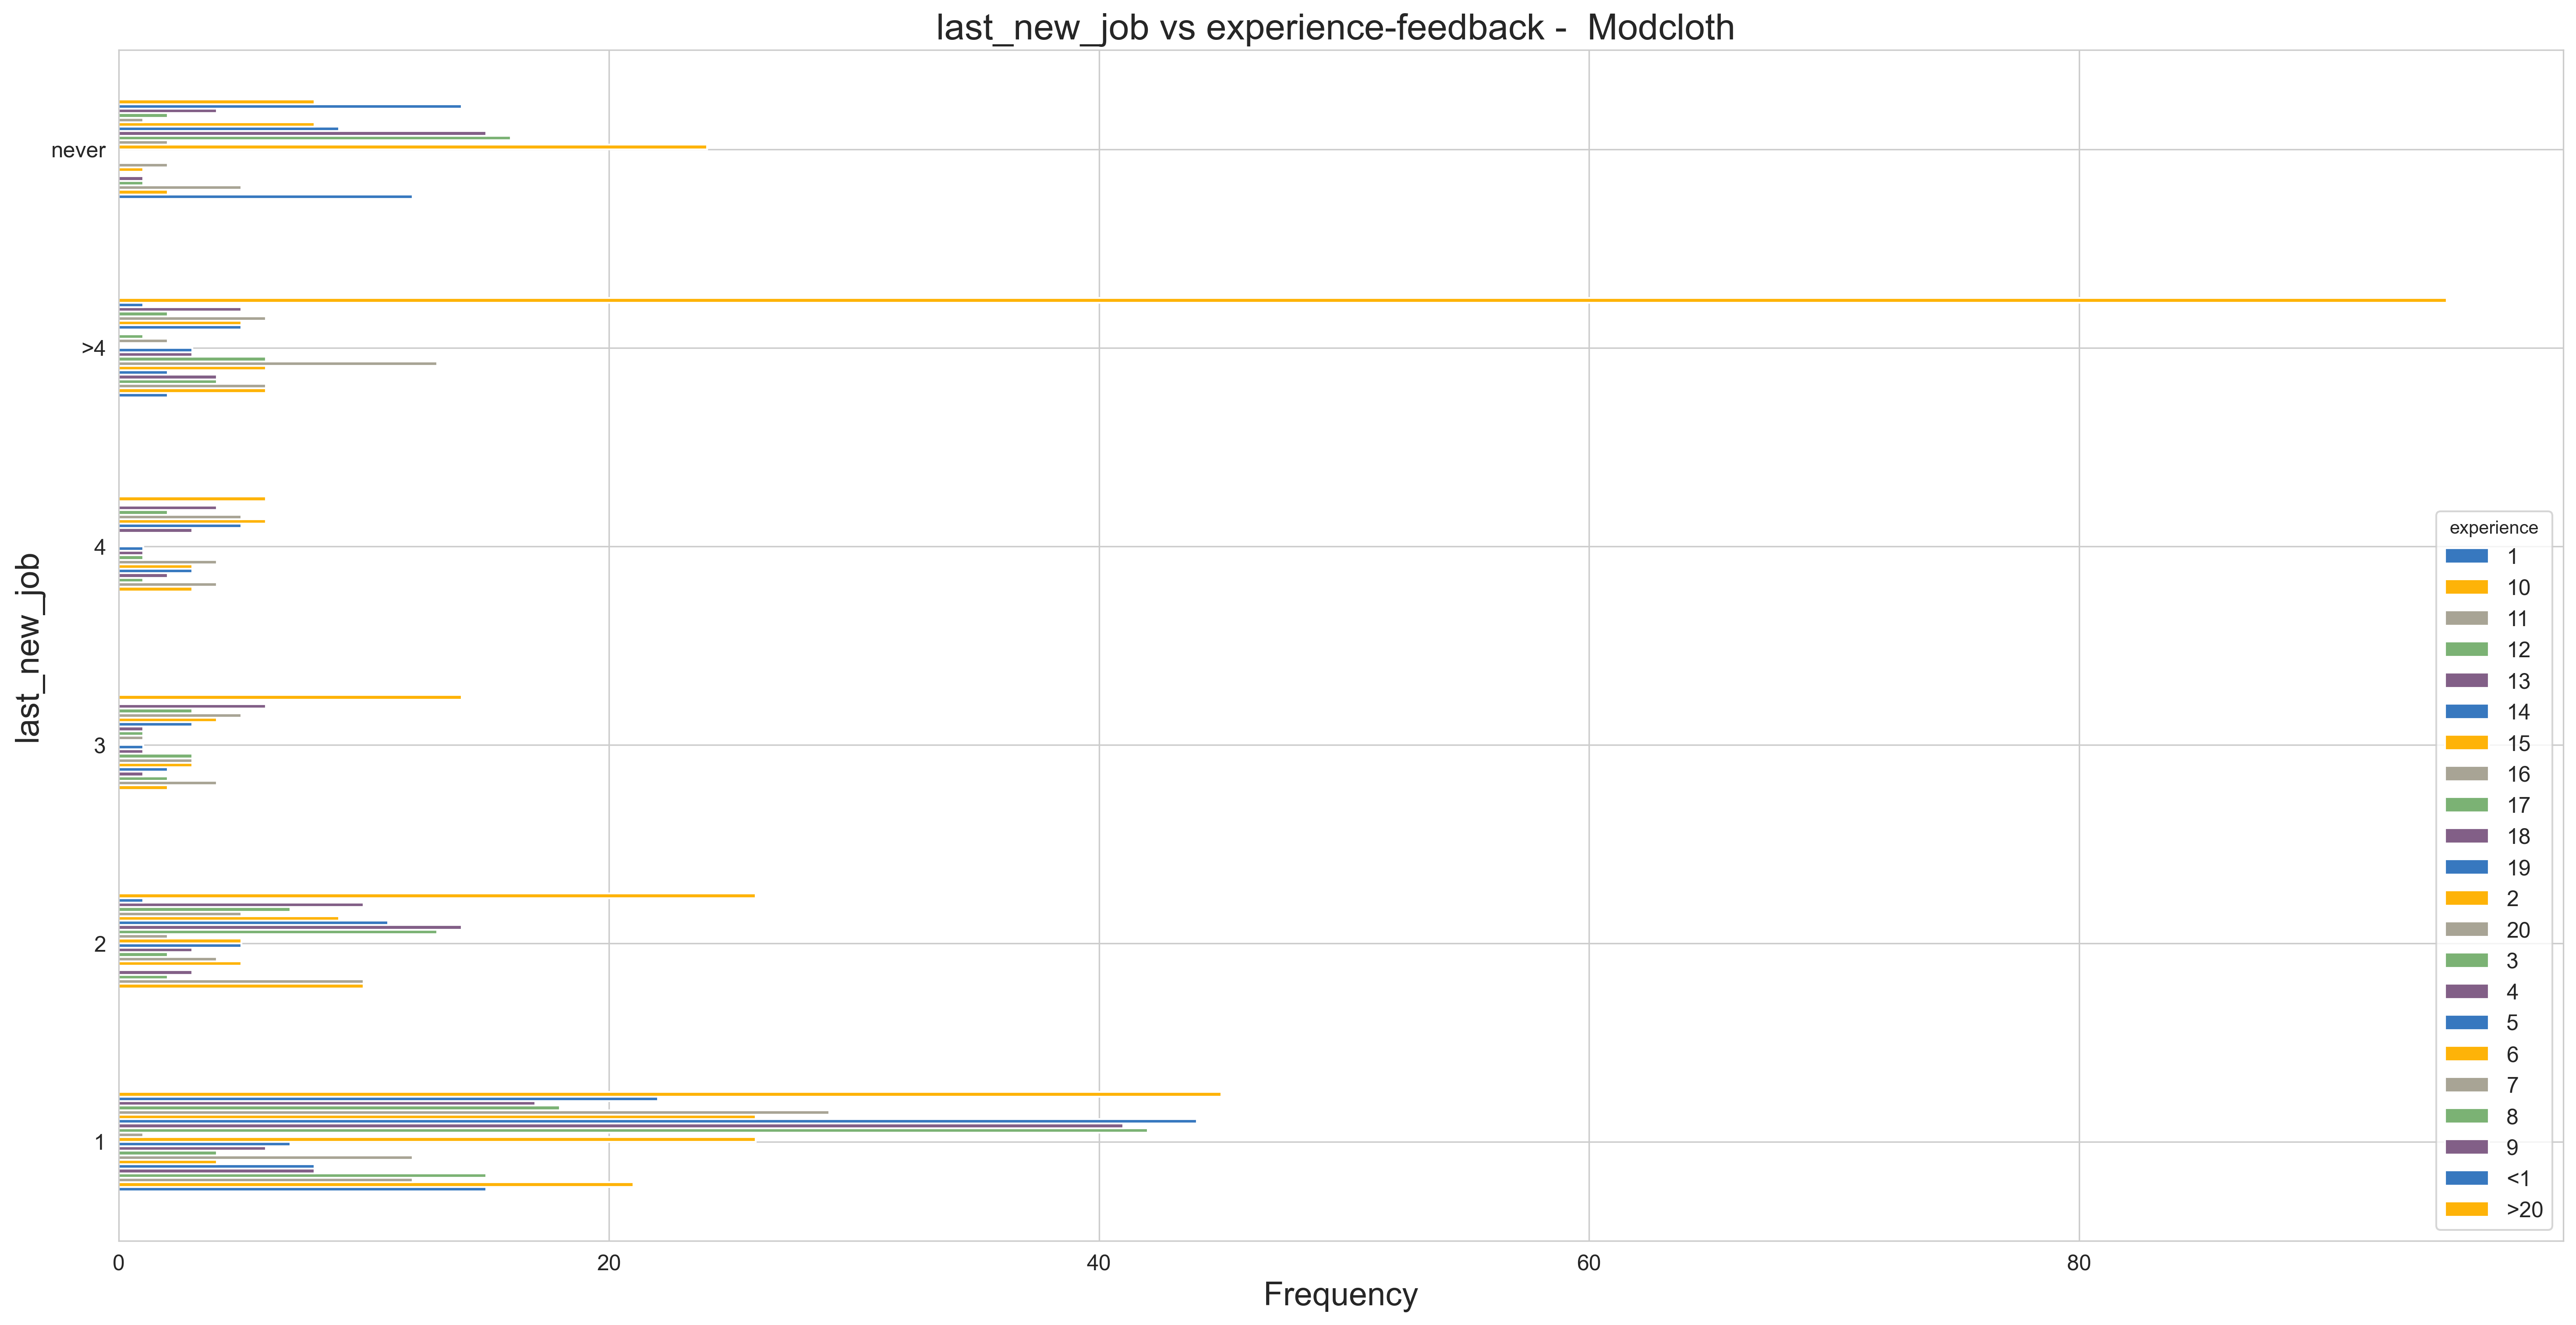

In [37]:
cat_fit=abc['experience'].value_counts()
cat_fit = cat_fit.unstack()
cat_fit_norm = norm_counts(cat_fit)
plot_barh(cat_fit, 'experience')

The more the experience, The less are the chances of leaving the job/fired from the job.

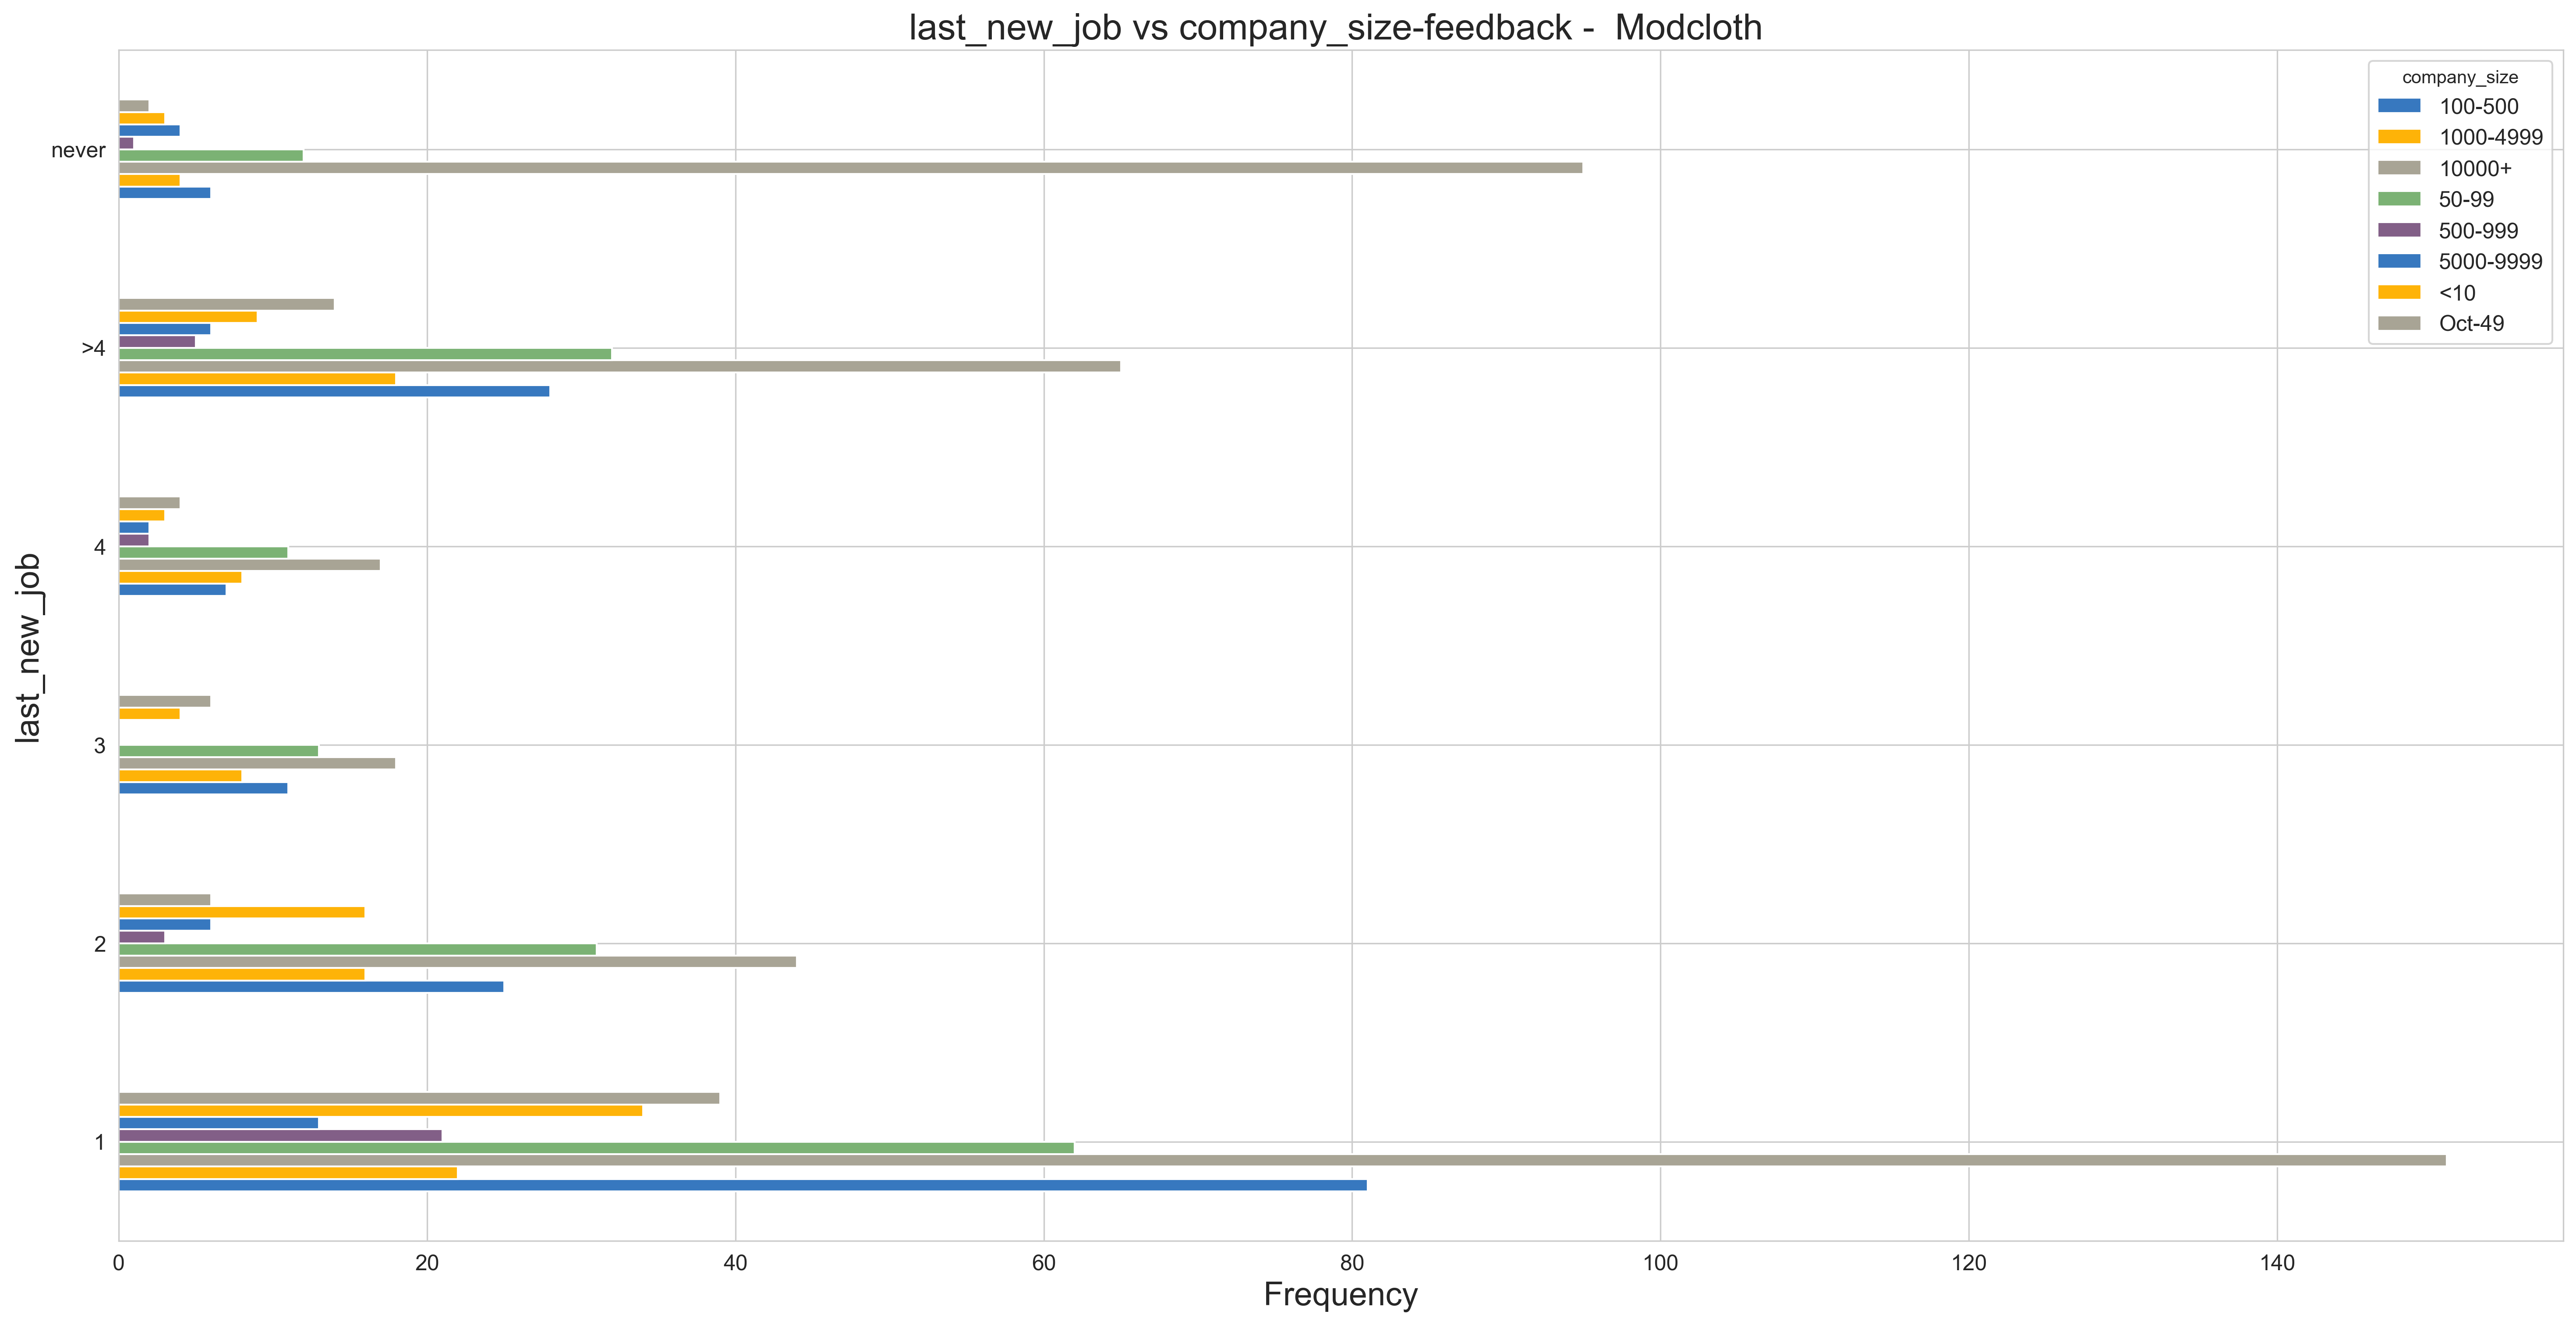

In [38]:
cat_fit=abc['company_size'].value_counts()
cat_fit = cat_fit.unstack()
cat_fit_norm = norm_counts(cat_fit)
plot_barh(cat_fit, 'company_size')

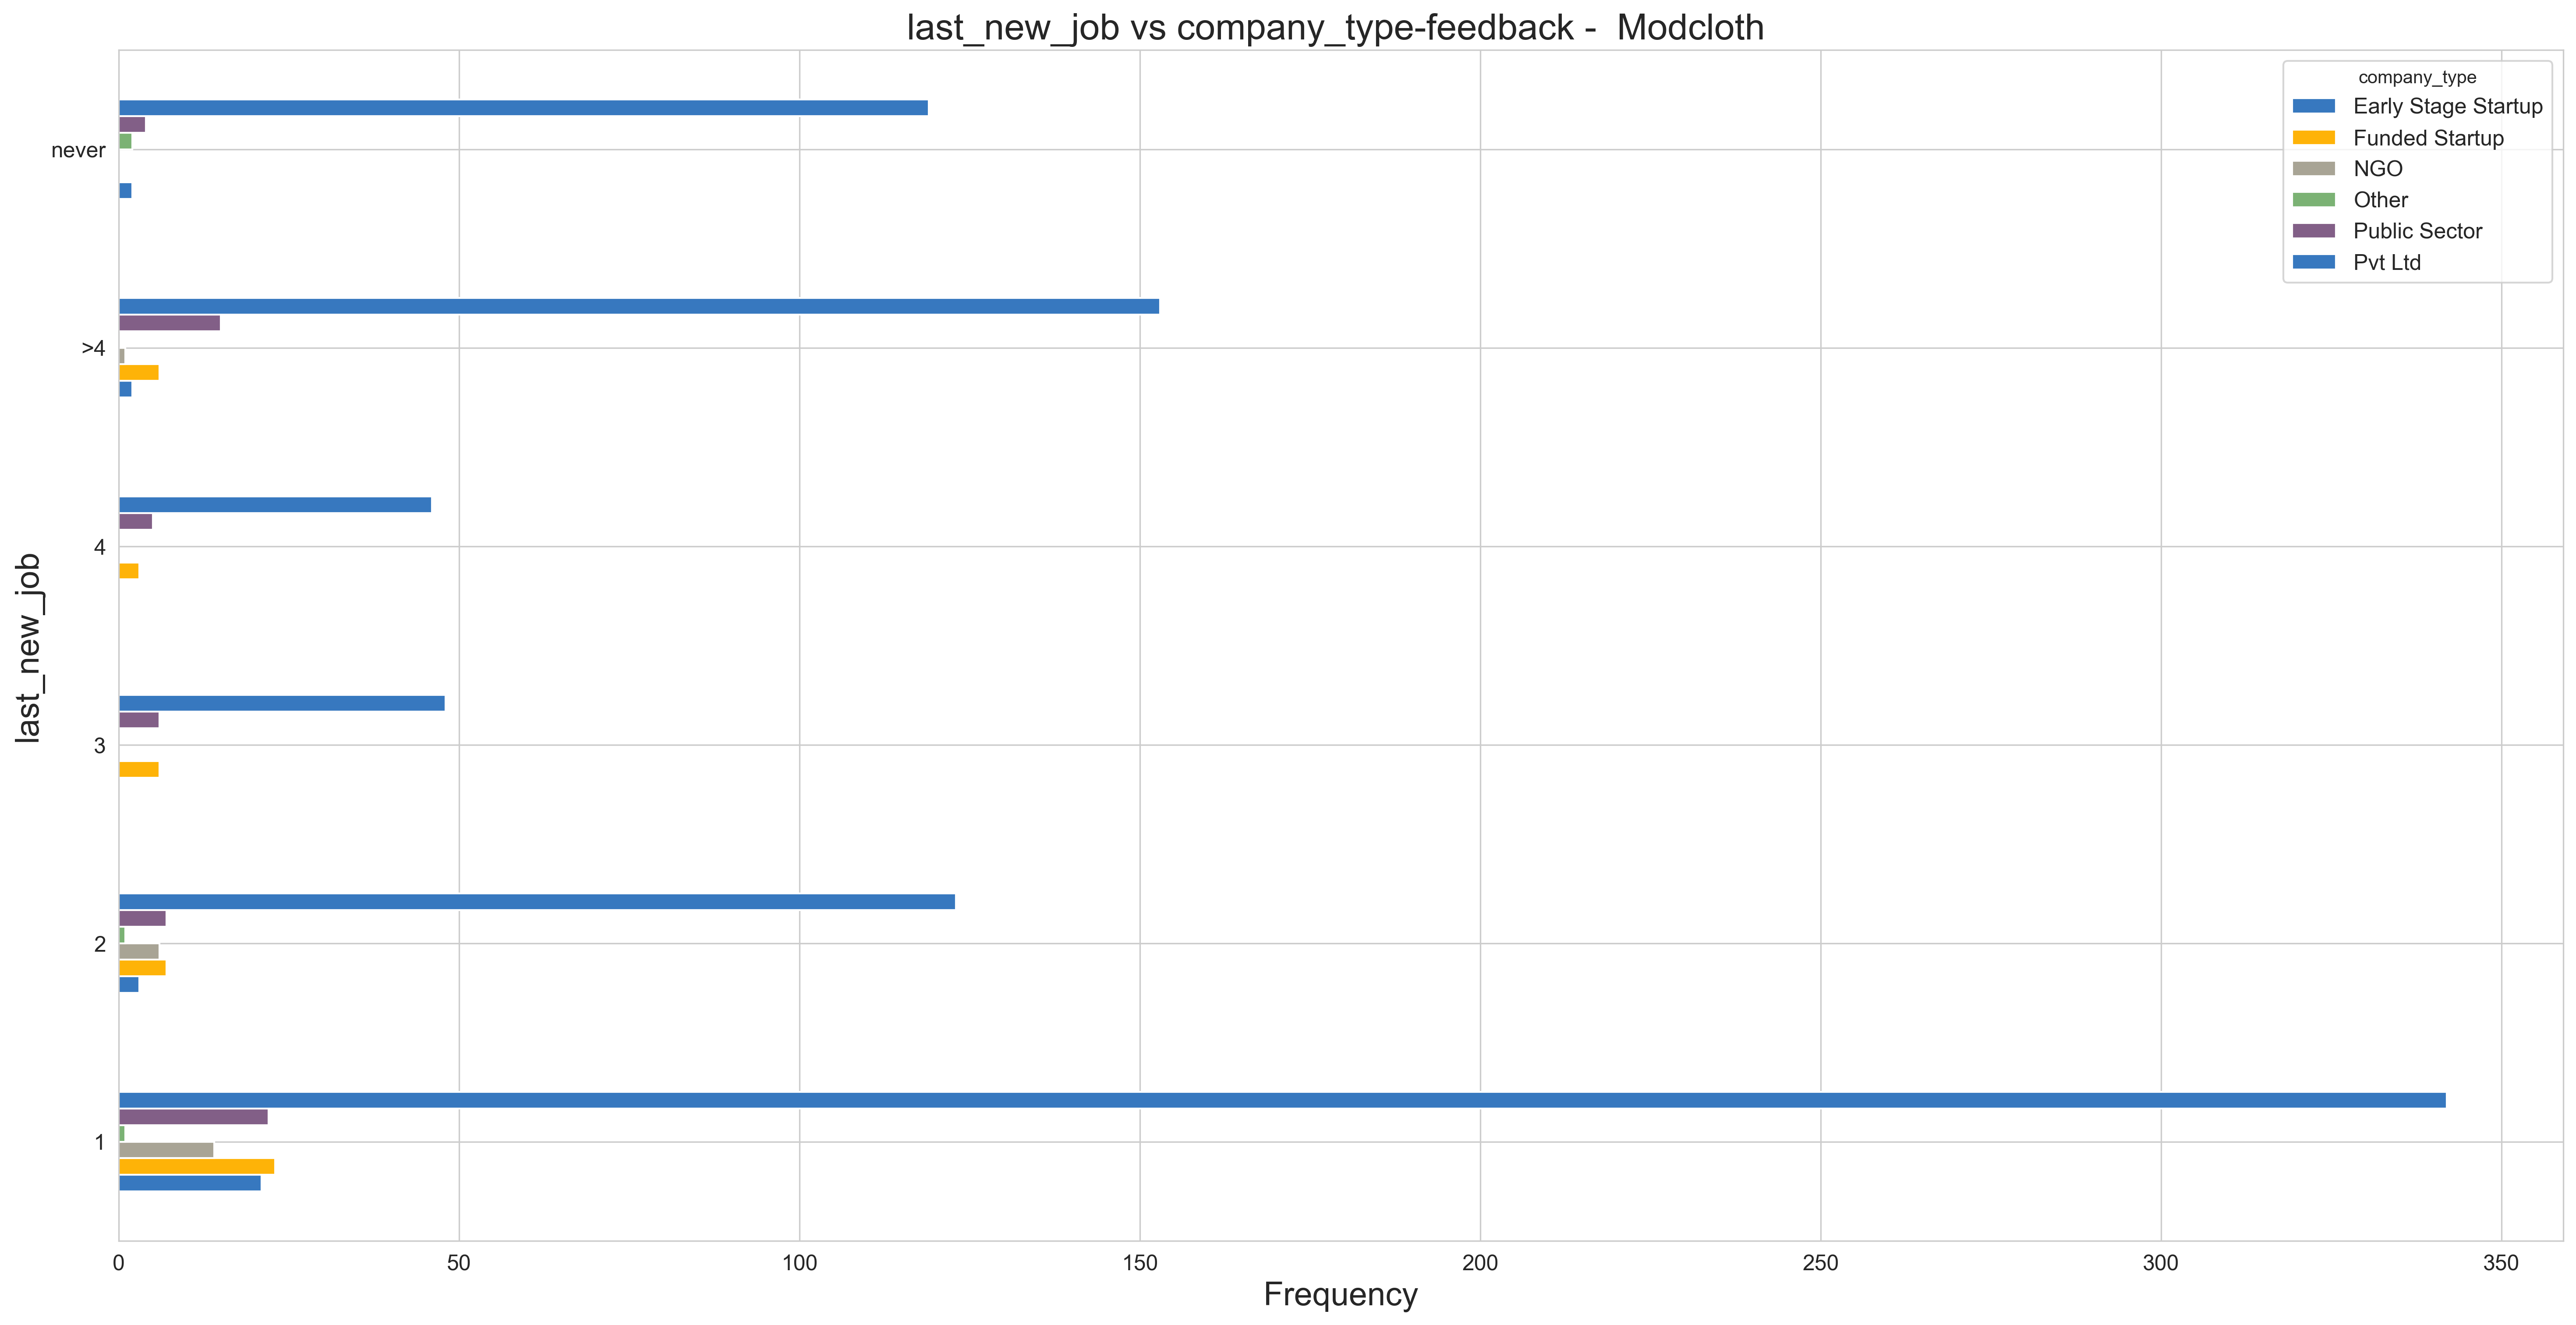

In [39]:
cat_fit=abc['company_type'].value_counts()
cat_fit = cat_fit.unstack()
cat_fit_norm = norm_counts(cat_fit)
plot_barh(cat_fit, 'company_type')

In [40]:
# Label Encoding on the dataset
le = preprocessing.LabelEncoder()

In [41]:
for j in data.columns:
  data[j]=le.fit_transform(data[j]) 

In [42]:
data.corr()

enrollee_id      city  city_development_index  \
enrollee_id                1.000000  0.055909               -0.026386   
city                       0.055909  1.000000               -0.365668   
city_development_index    -0.026386 -0.365668                1.000000   
gender                    -0.008067  0.018196               -0.016077   
relevent_experience       -0.037516 -0.009530               -0.069655   
enrolled_university        0.036729 -0.066513                0.198278   
education_level           -0.034303 -0.033840                0.135209   
major_discipline          -0.033380  0.106636               -0.114814   
experience                 0.050451 -0.013865                0.028749   
company_size               0.036797  0.077697               -0.066536   
company_type              -0.015860 -0.000855               -0.010484   
last_new_job               0.033061 -0.018742                0.018306   
training_hours             0.056922  0.034975               -0.040080   

                          gender  relevent_experience  enrolled_university  \
enrollee_id            -0.008067            -0.037516             0.036729   
city                    0.018196            -0.009530            -0.066513   
city_development_index -0.016077            -0.069655             0.198278   
gender                  1.000000            -0.005694            -0.009661   
relevent_experience    -0.005694             1.000000            -0.393508   
enrolled_university    -0.009661            -0.393508             1.000000   
education_level        -0.055598             0.057801             0.028682   
major_discipline        0.067271             0.025238            -0.101450   
experience              0.018044            -0.020159             0.039306   
company_size           -0.027681            -0.017634            -0.056766   
company_type            0.010073             0.044239            -0.037232   
last_new_job            0.052351             0.154715             0.039919   
training_hours          0.031146            -0.031417            -0.005439   

                        education_level  major_discipline  experience  \
enrollee_id                   -0.034303         -0.033380    0.050451   
city                          -0.033840          0.106636   -0.013865   
city_development_index         0.135209         -0.114814    0.028749   
gender                        -0.055598          0.067271    0.018044   
relevent_experience            0.057801          0.025238   -0.020159   
enrolled_university            0.028682         -0.101450    0.039306   
education_level                1.000000         -0.012545   -0.022290   
major_discipline              -0.012545          1.000000   -0.038073   
experience                    -0.022290         -0.038073    1.000000   
company_size                  -0.064318         -0.027562    0.062103   
company_type                  -0.009041          0.058297   -0.057852   
last_new_job                   0.074289          0.023534    0.060114   
training_hours                 0.015483         -0.010393    0.047321   

                        company_size  company_type  last_new_job  \
enrollee_id                 0.036797     -0.015860      0.033061   
city                        0.077697     -0.000855     -0.018742   
city_development_index     -0.066536     -0.010484      0.018306   
gender                     -0.027681      0.010073      0.052351   
relevent_experience        -0.017634      0.044239      0.154715   
enrolled_university        -0.056766     -0.037232      0.039919   
education_level            -0.064318     -0.009041      0.074289   
major_discipline           -0.027562      0.058297      0.023534   
experience                  0.062103     -0.057852      0.060114   
company_size                1.000000     -0.212843     -0.062849   
company_type               -0.212843      1.000000      0.140212   
last_new_job               -0.062849      0.140212      1.000000   
t

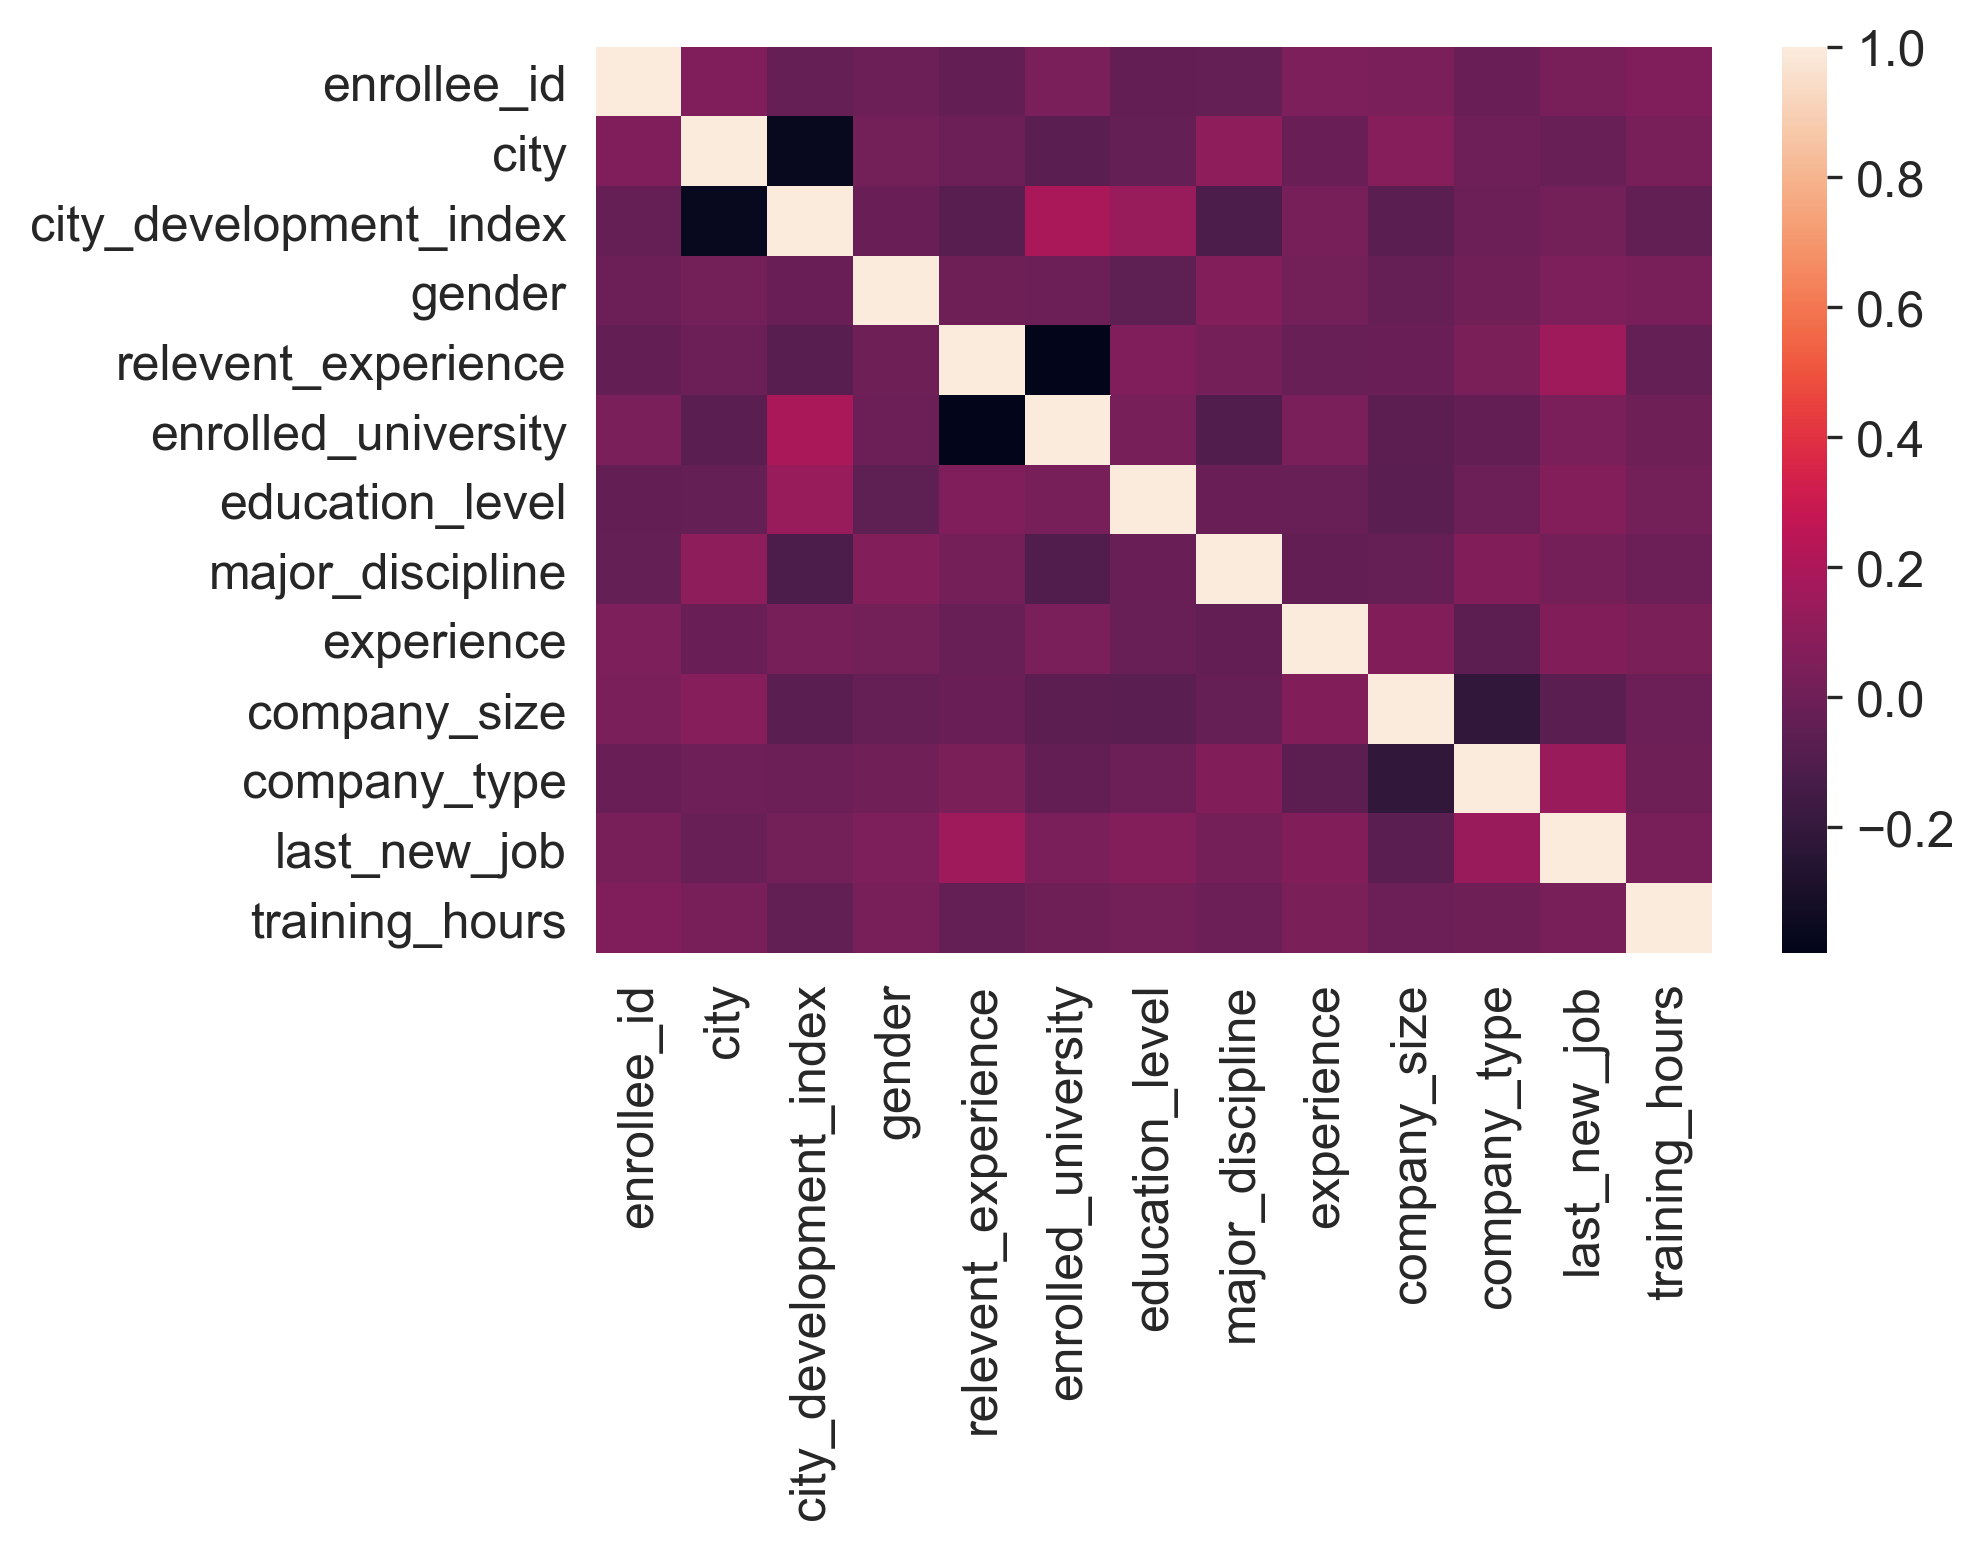

In [43]:
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Above heatmap shows that no two columns of the dataset are heavily dependent on each other and hence they have their own individual and independent values of particular features, this makes it a good dataset.

Apart, these 2 pairs of columns are somewhere related:<br/>
1. city development index and enrolled university
2. relevent experience and last_new_job

In [44]:
Y=data['last_new_job']
data=data.drop(['last_new_job'],axis=1)

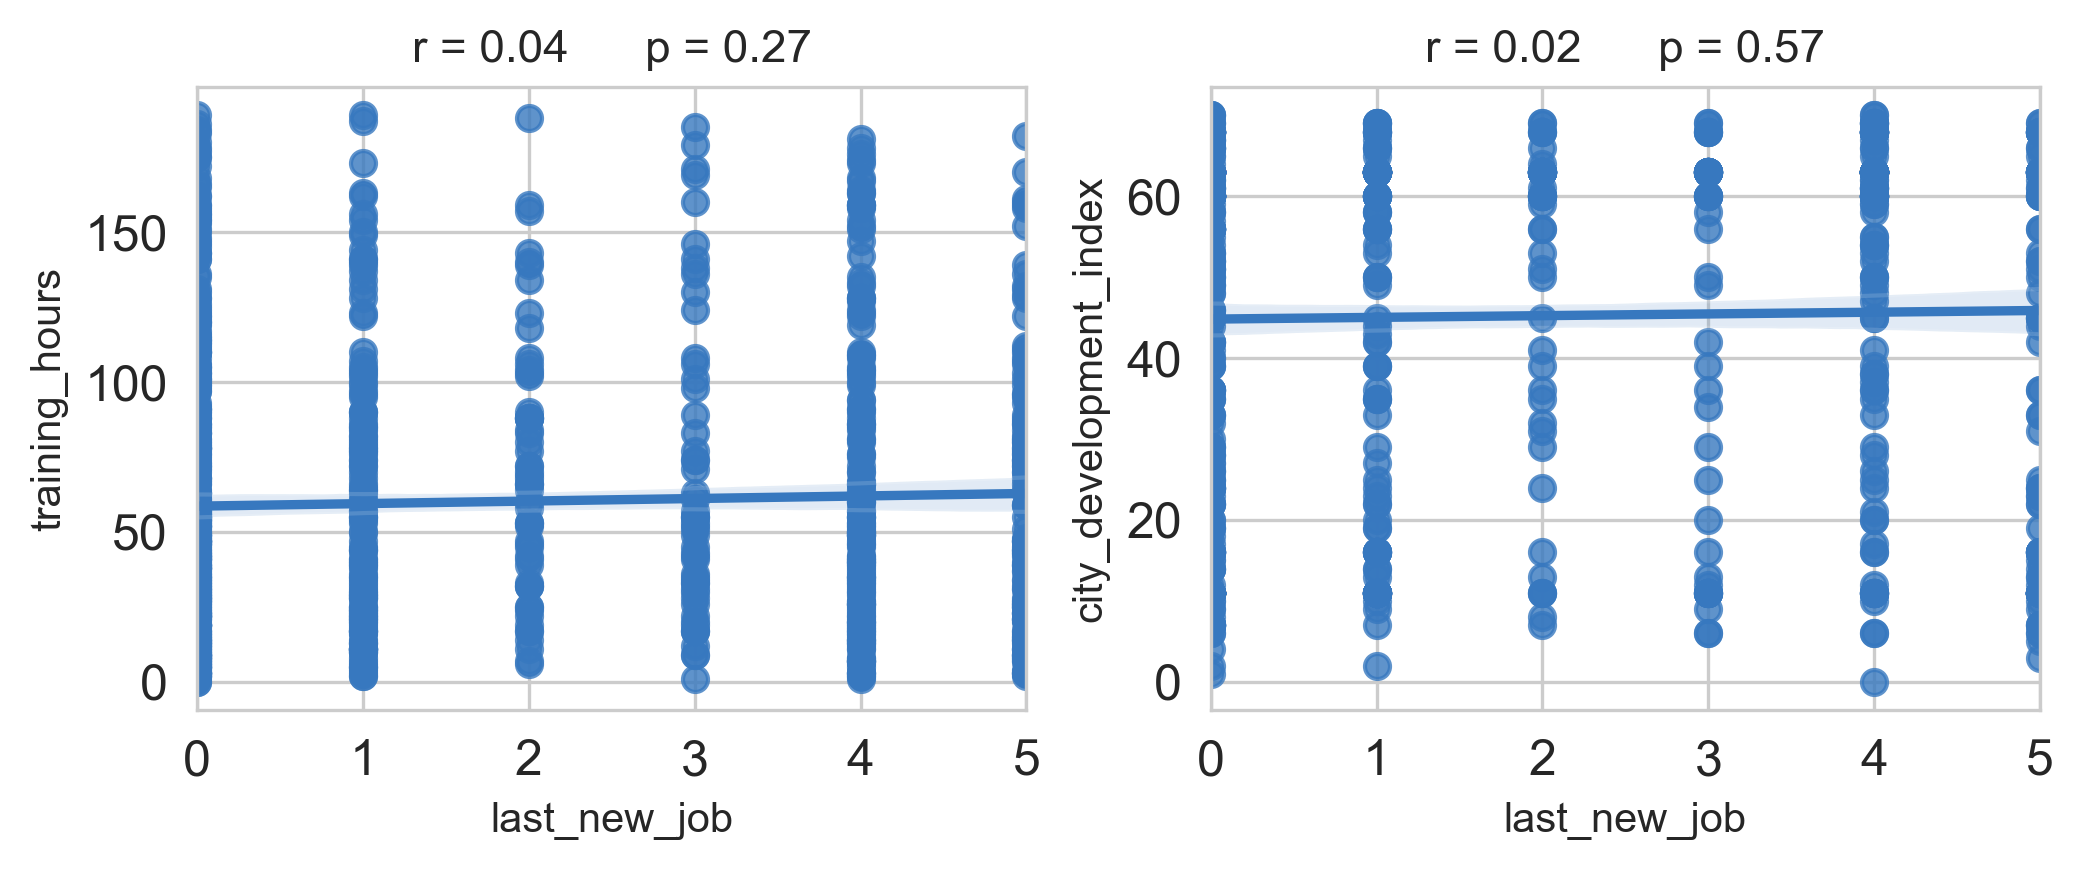

In [45]:
nr_cols = 2
nr_rows = 1
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_not_plot = ['training_hours', 'city_development_index']

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
          sns.regplot(Y,data[li_not_plot[c]],  ax = axs[c])
          stp = stats.pearsonr(data[li_not_plot[c]], Y)
          str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
          axs[c].set_title(str_title,fontsize=11)
          
plt.tight_layout()    
plt.show()   

Curve showing statistical relationship between target variable and numeric feature variables.

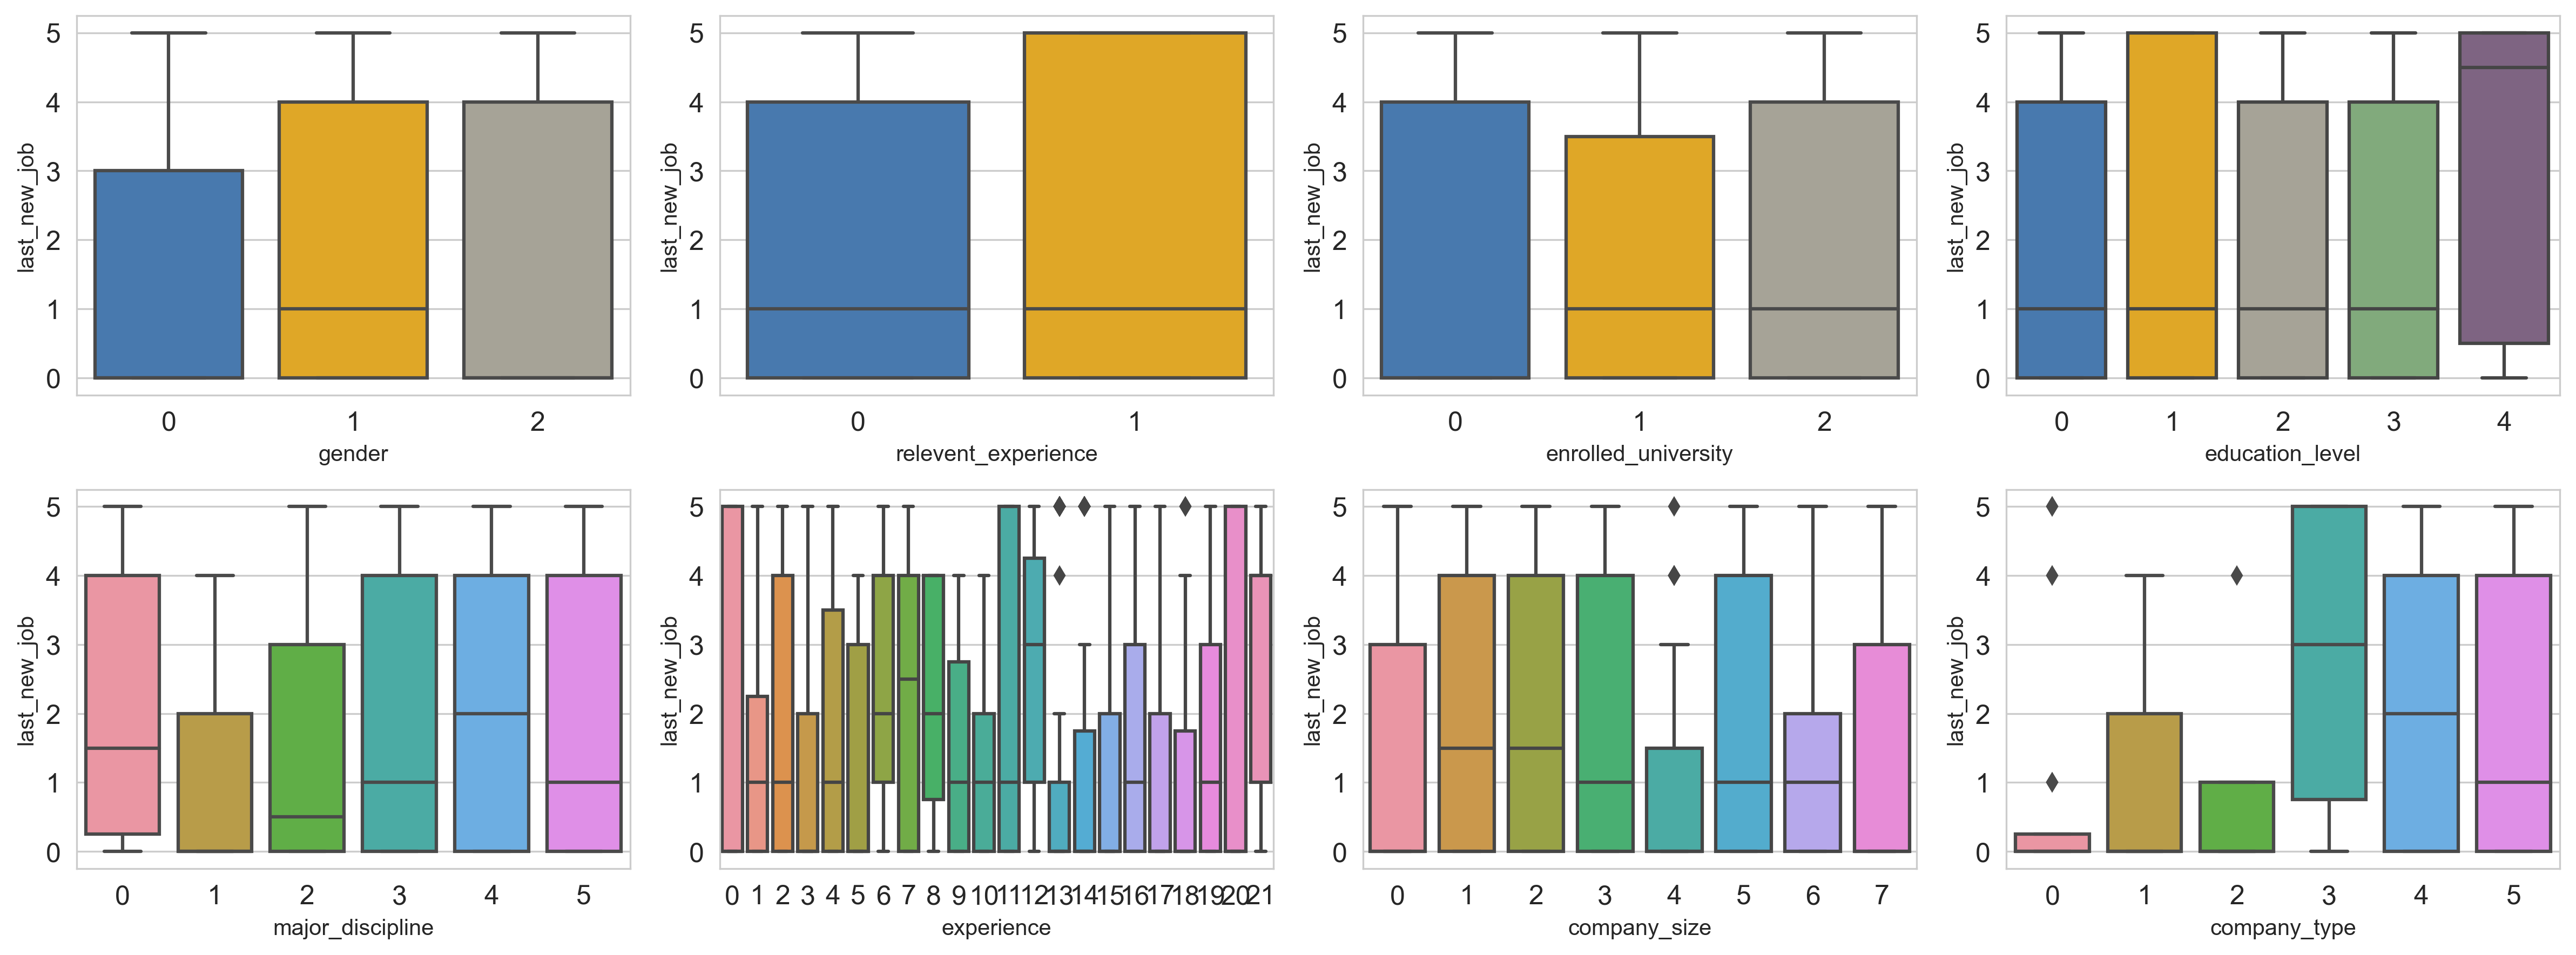

In [46]:
li_cat_feats = ['gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type']
nr_rows = 2
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=Y, data=data, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()  

In [47]:
X=data.values
X=np.array(X)
Y=np.array(Y)

## **DATA FITTING**

In [48]:
# splitting the dataset in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [49]:
# using XGBoost
xgb = XGBClassifier(max_depth=7, n_estimators=300, colsample_bytree=0.8, subsample=0.8, nthread=10, learning_rate=0.3, objective='multi:softmax',reg_lambda = 1)
xgb.fit(X_train,y_train,eval_metric=["rmse"])
p=xgb.predict(X_train)
print(classification_report(y_train, p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       126
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        44
           4       1.00      1.00      1.00       145
           5       1.00      1.00      1.00        98

    accuracy                           1.00       790
   macro avg       1.00      1.00      1.00       790
weighted avg       1.00      1.00      1.00       790



In [50]:
p_test = xgb.predict(X_test)
print(classification_report(y_test,p_test))

              precision    recall  f1-score   support

           0       0.51      0.62      0.56        95
           1       0.04      0.05      0.04        21
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        10
           4       0.39      0.41      0.40        32
           5       0.50      0.34      0.41        29

    accuracy                           0.42       198
   macro avg       0.24      0.24      0.24       198
weighted avg       0.39      0.42      0.40       198



In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
# using Logistic Regression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [53]:
p=clf.predict(X_test)
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.49      0.97      0.65        95
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        10
           4       0.12      0.03      0.05        32
           5       1.00      0.03      0.07        29

    accuracy                           0.47       198
   macro avg       0.27      0.17      0.13       198
weighted avg       0.40      0.47      0.33       198

